# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
# import libraries and read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

vehicles_ads = pd.read_csv('')

#### Studing the general information 

In [2]:
vehicles_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
vehicles_ads.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
vehicles_ads.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [5]:
vehicles_ads.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
30501,15999,2003.0,gmc sierra 2500hd,good,NaN,diesel,250436.0,automatic,truck,red,1.0,2018-10-26,58


In [6]:
vehicles_ads.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusion

The first look at the data set let us conclude that we have information on 
1. vehicle's price, 
2. vehicle's model,
3. vehicle's model year, i.e. vehicle's year of production,
4. vehicle's condition,
5. vehicle's engine cylinders quantity,
6. vehicle's engine fuel type,
7. vehicle's mileage, 
8. vehicle's transmission type, 
9. vehicle's type,
10. vehicle's paint color, 
11. vehicle's drive type (whether a vehicle is 4 WD),
12. vehicle's advertisement placement date,
13. vehicle's advertisement placement duration.

Even the first look is enough to find out that there are some issues with the data. We may definitely say, that: 

1. there are missing values in colums: 

a) 'model_year' (vehicle's model year), 
b) 'cylinders' (engine cylinders quantity),
c) 'odometer' (vehicle's miliage),
d) 'paint_color' (vehicle's paint color),
e) 'is_4wd' (vehicle's drive type).

The reason why the first four parameters are missing may be explained by the fact that some users do not specify this information when post their advertisements. But the last one, 'is_4wd'(vehicle's drive type) is more intersting. This column contains only "1" values and no "0" values, while among 51525 there are 25953 missing values. Hence the "missing" values may just represent be damaged data and the real values are "0", i.e. 2wd cars.

2. some of the values are of inappropriate data types:

a) values in the columns 'cylinders' (engine cylinders quantity), 'odometer' (vehicle's miliage), 'is_4wd' (vehicle's drive type) are of float type, which is just a error in the case of engine cylinders quantity (there is no engine with 4,5 cylinders) and in the case of drive type indication (it is a Boolean field), and in the case of vehicle's miliage it is just excessive data (we do not need to know every centimeter of a vehicle's miliage). These values should be of integer type.

b) values in the column 'date_posted' (vehicle's advertisement placement date) are of float type and values in the column 'model_year' (vehicle's model year) are of object type as these values represent information on dates, they should be converted into datetime format.

These are most obvious issues that we see at the first look, there may be other hidded problems with the data, so we need to proceed with further data prepocessing.


### Step 2. Data preprocessing

#### Processing missing category values

In [7]:
# checking values in 'model' column
vehicles_ads['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [8]:
# checking values in 'condition' column:
vehicles_ads['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [9]:
# checking values in 'fuel' column: 
vehicles_ads['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [10]:
# checking values in 'transmission' column: 
vehicles_ads['transmission'].unique()

array(['automatic', 'manual', 'other'], dtype=object)

In [11]:
# checking values in 'type' column: 
vehicles_ads['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [12]:
# checking values in 'paint_color' column: 
vehicles_ads['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [13]:
# finding number of nan values: 
vehicles_ads['paint_color'].isna().sum()

9267

In [14]:
# checking if there is any relation between missing values in 'paint_color' and other columns
vehicles_ads[vehicles_ads['paint_color'].isnull()].count()

price           9267
model_year      8615
model           9267
condition       9267
cylinders       8317
fuel            9267
odometer        7812
transmission    9267
type            9267
paint_color        0
is_4wd          4630
date_posted     9267
days_listed     9267
dtype: int64

In [15]:
# filling in the missing values in 'paint_color' with 'unspecified'
vehicles_ads['paint_color'].fillna('unspecified', inplace = True)

In [16]:
# checking the results
vehicles_ads['paint_color'].unique()

array(['unspecified', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [17]:
# processing missing values in 'is_4wd' column
# looking at the unique values once more time
vehicles_ads['is_4wd'].unique()

array([ 1., nan])

In [18]:
# finding number of nan values: 
vehicles_ads['is_4wd'].isna().sum()

25953

In [19]:
# filling in the null values with 0
vehicles_ads['is_4wd'].fillna(0, inplace=True)

In [20]:
# checking results
vehicles_ads['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

#### Processing quantative values

In [21]:
# digging into 'price' column to find out if there are any issues: 
vehicles_ads['price'].unique()

array([ 9400, 25500,  5500, ...,  3636,  9249,  7455])

In [22]:
vehicles_ads['price'].value_counts()

1        798
6995     719
5995     655
4995     624
3500     620
        ... 
58500      1
3993       1
32987      1
3744       1
7455       1
Name: price, Length: 3443, dtype: int64

In [23]:
# looking at rows where vehicle's price is 1: 
vehicles_ads.query('price == 1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,unspecified,0.0,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,unspecified,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,0.0,2019-03-18,63
3902,1,1996.0,ford f-150,fair,NaN,gas,163000.0,manual,truck,white,0.0,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,unspecified,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,NaN,automatic,SUV,black,1.0,2018-08-06,28
49709,1,NaN,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


In [24]:
# digging into column 'model_year'to find out if there are any othe issues than null values:
vehicles_ads['model_year'].value_counts()

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 68, dtype: int64

In [25]:
vehicles_ads['model_year'].unique()

array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [26]:
# looking at 'abnormal' years:

vehicles_ads.query('model_year < 1980')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
357,16600,1975.0,chevrolet corvette,excellent,8.0,gas,75000.0,manual,coupe,unspecified,0.0,2019-03-09,69
358,18400,1975.0,chevrolet corvette,excellent,8.0,gas,18000.0,automatic,coupe,orange,0.0,2019-01-06,41
899,10500,1977.0,chevrolet corvette,excellent,8.0,gas,54000.0,automatic,coupe,yellow,0.0,2019-02-24,54
1045,3500,1974.0,ford f-250,excellent,8.0,gas,139000.0,automatic,pickup,orange,0.0,2018-10-28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49783,7000,1977.0,chevrolet corvette,good,NaN,gas,110000.0,automatic,coupe,blue,0.0,2018-08-14,138
50169,7500,1977.0,ford f-250,good,8.0,gas,112000.0,automatic,truck,yellow,1.0,2018-07-03,99
50254,12000,1973.0,chevrolet corvette,good,8.0,gas,42820.0,manual,coupe,blue,0.0,2018-07-07,9
50451,49900,1973.0,chevrolet corvette,excellent,NaN,gas,NaN,manual,convertible,red,0.0,2018-06-09,41


In [27]:
# zooming in old cars 
vehicles_ads.query('model_year < 1960')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,0.0,2019-01-18,24
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0.0,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,0.0,2018-11-22,10
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unspecified,0.0,2018-08-11,10


In [28]:
# deleting the most suspicious rows and checking the results
vehicles_ads = vehicles_ads.drop([22595,33906,33907,34713,36582,45694], axis=0)
vehicles_ads.query('model_year < 1960')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unspecified,0.0,2018-08-11,10


In [29]:
vehicles_ads['model_year'].isna().sum()

3619

In [30]:
# checking if there is any relation between missing values in 'model_year' and other columns
vehicles_ads[vehicles_ads['model_year'].isnull()].count()

price           3619
model_year         0
model           3619
condition       3619
cylinders       3256
fuel            3619
odometer        3070
transmission    3619
type            3619
paint_color     3619
is_4wd          3619
date_posted     3619
days_listed     3619
dtype: int64

In [31]:
# looking at the initial 'model_years' values distrubution for model categories
vehicles_ads.groupby(['model'], sort=False)['model_year'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
bmw x5,246.0,2008.991870,3.878767,2001.0,2006.0,2010.0,2012.0,2018.0
ford f-150,2603.0,2009.413753,6.319795,1954.0,2006.0,2011.0,2014.0,2019.0
hyundai sonata,446.0,2011.360987,3.964132,1997.0,2009.0,2012.0,2015.0,2018.0
chrysler 200,224.0,2013.691964,1.555758,2009.0,2012.0,2014.0,2015.0,2017.0
chrysler 300,300.0,2010.883333,4.575241,1968.0,2007.0,2012.0,2014.0,2018.0
...,...,...,...,...,...,...,...,...
dodge dakota,224.0,2003.232143,4.510043,1987.0,2001.0,2004.0,2006.0,2011.0
ford f350,231.0,2007.151515,7.219447,1977.0,2003.0,2008.0,2012.5,2019.0
chevrolet trailblazer,239.0,2004.979079,2.030125,1999.0,2003.0,2005.0,2007.0,2009.0


In [32]:
# dropping null values in 'model_year'
vehicles_ads = vehicles_ads.dropna(axis=0, subset= ['model_year'])
# checking  results
vehicles_ads['model_year'].isna().sum()

0

In [33]:
# looking at the values in 'cylinders' by various methods
vehicles_ads['cylinders'].isna().sum()

4896

In [34]:
vehicles_ads['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [35]:
vehicles_ads['cylinders'].value_counts()

8.0     14701
6.0     14647
4.0     12856
10.0      517
5.0       248
3.0        33
12.0        2
Name: cylinders, dtype: int64

In [36]:
# checking if there is any relation between missing values in 'cylinders' and other columns
vehicles_ads[vehicles_ads['cylinders'].isnull()].count()

price           4896
model_year      4896
model           4896
condition       4896
cylinders          0
fuel            4896
odometer        4143
transmission    4896
type            4896
paint_color     4896
is_4wd          4896
date_posted     4896
days_listed     4896
dtype: int64

In [37]:
# looking deeper at the values to see their distribution
vehicles_ads.groupby(['model'])['cylinders'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
acura tl,200.0,5.970000,0.243715,4.0,6.0,6.0,6.0,6.0
bmw x5,231.0,6.389610,0.793821,6.0,6.0,6.0,6.0,8.0
buick enclave,234.0,6.000000,0.185296,4.0,6.0,6.0,6.0,8.0
cadillac escalade,267.0,7.992509,0.122398,6.0,8.0,8.0,8.0,8.0
chevrolet camaro,351.0,6.871795,1.353546,4.0,6.0,6.0,8.0,10.0
...,...,...,...,...,...,...,...,...
toyota sienna,275.0,5.956364,0.338935,4.0,6.0,6.0,6.0,8.0
toyota tacoma,677.0,5.344165,0.950560,4.0,4.0,6.0,6.0,8.0
toyota tundra,515.0,7.922330,0.606215,4.0,8.0,8.0,8.0,10.0


In [38]:
# filling the missing values in 'cylinders' with the mean values for related models
vehicles_ads['cylinders'] = vehicles_ads.groupby(['model'], sort=False)['cylinders'].apply(
                                        lambda x: x.fillna(x.median()))

In [39]:
# checking  results
vehicles_ads['cylinders'].unique()

array([ 6.,  4.,  8.,  5., 10.,  3., 12.])

In [40]:
vehicles_ads['cylinders'].value_counts()

8.0     16439
6.0     16259
4.0     14382
10.0      517
5.0       268
3.0        33
12.0        2
Name: cylinders, dtype: int64

In [41]:
# looking at the values in 'odometer' by various methods
vehicles_ads['odometer'].isna().sum()

7341

In [42]:
vehicles_ads['odometer'].value_counts()

0.0         172
140000.0    169
130000.0    162
120000.0    160
200000.0    153
           ... 
49478.0       1
168235.0      1
62727.0       1
91490.0       1
139573.0      1
Name: odometer, Length: 16898, dtype: int64

In [43]:
vehicles_ads['odometer'].describe()

count     40559.000000
mean     115431.770039
std       65216.302330
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [44]:
vehicles_ads.query('odometer == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,unspecified,0.0,2019-03-14,16
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,unspecified,0.0,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39
2049,30000,1969.0,chevrolet corvette,excellent,8.0,other,0.0,automatic,convertible,white,0.0,2018-08-01,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49043,8987,2011.0,honda cr-v,good,4.0,gas,0.0,automatic,SUV,custom,1.0,2019-02-18,38
49170,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-04-14,31
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-02-15,7
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,0.0,2018-07-24,90


In [45]:
# replacing 0 values with nan values
vehicles_ads['odometer'] = vehicles_ads['odometer'].where(vehicles_ads['odometer'] != 0, np.nan) 

In [46]:
# checking results
vehicles_ads['odometer'].value_counts()

140000.0    169
130000.0    162
120000.0    160
200000.0    153
160000.0    151
           ... 
49478.0       1
168235.0      1
62727.0       1
91490.0       1
139573.0      1
Name: odometer, Length: 16897, dtype: int64

In [47]:
vehicles_ads['odometer'].isna().sum()

7513

In [48]:
# filling the null values with median values for each 'model_year'
vehicles_ads['odometer'] = vehicles_ads.groupby(['model_year'])['odometer'].transform(
    lambda grp: grp.fillna(grp.median()))

# checking results by various methods
vehicles_ads['odometer'].isna().sum()

0

In [49]:
vehicles_ads['odometer'].value_counts()

142000.0    586
99847.0     577
90113.0     554
110600.0    541
78840.0     531
           ... 
174297.0      1
117234.0      1
181375.0      1
205771.0      1
139573.0      1
Name: odometer, Length: 16914, dtype: int64

In [50]:
# checking 'date_posted' by various  methods
vehicles_ads['date_posted'].isna().sum()

0

In [51]:
vehicles_ads['date_posted'].value_counts()

2019-03-17    177
2019-03-11    167
2018-10-09    165
2019-01-05    164
2019-04-10    160
             ... 
2018-06-05    108
2018-06-20    108
2019-01-11    107
2018-07-04    105
2019-01-04    101
Name: date_posted, Length: 354, dtype: int64

In [52]:
vehicles_ads['date_posted'].describe()

count          47900
unique           354
top       2019-03-17
freq             177
Name: date_posted, dtype: object

In [53]:
vehicles_ads['date_posted'].unique()

array(['2018-06-23', '2019-02-07', '2019-03-22', '2019-04-02',
       '2018-06-20', '2018-12-27', '2019-01-07', '2018-07-16',
       '2019-02-15', '2018-09-17', '2019-03-28', '2019-01-14',
       '2019-01-31', '2018-05-15', '2018-12-30', '2018-08-16',
       '2019-04-09', '2018-08-25', '2018-08-22', '2019-01-05',
       '2018-05-17', '2018-06-11', '2018-07-26', '2018-10-25',
       '2018-05-19', '2018-10-22', '2019-02-18', '2019-02-19',
       '2018-09-13', '2018-11-12', '2018-12-25', '2018-06-04',
       '2018-05-11', '2018-05-05', '2018-07-22', '2019-03-08',
       '2019-03-31', '2019-01-12', '2018-09-20', '2019-01-15',
       '2018-11-18', '2018-05-27', '2018-07-19', '2019-03-10',
       '2018-10-09', '2018-10-18', '2018-05-03', '2018-11-29',
       '2019-02-16', '2019-01-30', '2018-07-15', '2018-05-16',
       '2018-07-01', '2019-04-18', '2018-12-20', '2019-03-14',
       '2018-05-29', '2019-01-13', '2019-01-23', '2018-11-07',
       '2018-05-09', '2018-12-24', '2018-11-27', '2018-

In [54]:
# checking 'days_listed' by various  methods 
vehicles_ads['days_listed'].isna().sum()

0

In [55]:
vehicles_ads['days_listed'].unique()

array([ 19,  79,   9,  28,  15,  73,  68,  17,  38,  29,  37,  24, 111,
        13,  25,  27,   8,  64,  39,  40,  43,  23,  42, 101,  20,  14,
         7,  31, 121,  22,  44,   1,  36,  21,  16,  10,  60,  51,  35,
        50, 261,  71,  99,   2,  26,  48,  54,  85,  41,  53,   3,  33,
        30,  47,  32,  18,  52, 152,  11, 100,  94,  82, 141,  70,  57,
        62,  46,  96,  58,  93,  49,  55,  67,  78,  12,   6, 108,  34,
        72, 112,  83,  61,  59, 130,   4,  98,   5, 164,  56,  75,  74,
        80,  66,  63, 109,  81,  90, 127,  45,  88,  91,  77,  69,  89,
       114,  84, 110, 140, 104, 120,  97,  76,  92, 128, 113, 129,  65,
       115, 106, 116, 154, 151, 147, 124, 102,  87, 143,  95,  86, 132,
       105, 107,   0, 103, 155, 118, 149, 144, 117, 122, 137, 263, 148,
       179, 126, 169, 136, 125, 131, 119, 177, 174, 173, 134, 171, 145,
       139, 166, 244, 142, 135, 162, 156, 183, 271, 138, 123, 157, 201,
       161, 158, 150, 181, 184, 133, 146, 195, 207, 163, 206, 23

In [56]:
vehicles_ads['days_listed'].describe()

count    47900.000000
mean        39.566409
std         28.202767
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [57]:
vehicles_ads['days_listed'].value_counts()

18     903
24     891
19     876
22     867
20     864
      ... 
240      1
209      1
188      1
192      1
221      1
Name: days_listed, Length: 223, dtype: int64

In [58]:
# looking at row wis 'days_listed' == 0 values
vehicles_ads.query('days_listed == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1247,14995,2008.0,chevrolet silverado 1500,excellent,8.0,gas,93300.0,automatic,truck,grey,1.0,2018-05-15,0
1711,59589,2019.0,chevrolet silverado 2500hd,excellent,8.0,diesel,14151.5,automatic,truck,white,1.0,2019-01-13,0
1983,14000,1999.0,ford f250,excellent,8.0,diesel,137500.0,automatic,truck,red,1.0,2018-09-27,0
2883,4000,2004.0,ram 1500,excellent,8.0,gas,250000.0,automatic,truck,brown,1.0,2018-08-13,0
3965,16750,1985.0,chevrolet corvette,like new,8.0,gas,24540.0,automatic,hatchback,white,0.0,2018-10-14,0
4567,5000,2007.0,toyota corolla,good,4.0,gas,223000.0,manual,sedan,silver,0.0,2018-07-11,0
4901,12500,2001.0,ram 1500,good,8.0,gas,99892.0,automatic,truck,black,1.0,2018-05-11,0
6114,500,2003.0,dodge dakota,fair,6.0,gas,215457.0,automatic,pickup,unspecified,0.0,2018-10-31,0
6548,4800,2007.0,honda odyssey,good,6.0,gas,152400.0,automatic,mini-van,brown,0.0,2018-09-25,0
7036,5900,2007.0,jeep grand cherokee laredo,excellent,6.0,gas,143000.0,automatic,SUV,grey,1.0,2018-07-21,0


In [59]:
# checking duplicates
vehicles_ads.duplicated().sum()

0

In [60]:
# checking results
vehicles_ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47900 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47900 non-null  int64  
 1   model_year    47900 non-null  float64
 2   model         47900 non-null  object 
 3   condition     47900 non-null  object 
 4   cylinders     47900 non-null  float64
 5   fuel          47900 non-null  object 
 6   odometer      47900 non-null  float64
 7   transmission  47900 non-null  object 
 8   type          47900 non-null  object 
 9   paint_color   47900 non-null  object 
 10  is_4wd        47900 non-null  float64
 11  date_posted   47900 non-null  object 
 12  days_listed   47900 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [61]:
# changing data types

vehicles_ads['model_year'] = vehicles_ads['model_year'].astype('int')
vehicles_ads['cylinders'] = vehicles_ads['cylinders'].astype('int')
vehicles_ads['odometer'] = vehicles_ads['odometer'].astype('int')
vehicles_ads['is_4wd'] = vehicles_ads['is_4wd'].astype('int')
vehicles_ads['date_posted'] = pd.to_datetime(vehicles_ads['date_posted'], 
                                             format = '%Y-%m-%d')

# checking results
display(vehicles_ads.info())
display(vehicles_ads.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47900 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47900 non-null  int64         
 1   model_year    47900 non-null  int64         
 2   model         47900 non-null  object        
 3   condition     47900 non-null  object        
 4   cylinders     47900 non-null  int64         
 5   fuel          47900 non-null  object        
 6   odometer      47900 non-null  int64         
 7   transmission  47900 non-null  object        
 8   type          47900 non-null  object        
 9   paint_color   47900 non-null  object        
 10  is_4wd        47900 non-null  int64         
 11  date_posted   47900 non-null  datetime64[ns]
 12  days_listed   47900 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


None

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unspecified,1,2018-06-23,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,161894,automatic,pickup,unspecified,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15


### Conclusion

A. Processing missing values and artifacts 

1. Missing values in 'paint_color'. 

We have found that there are 9267 missing values in the column 'paint_color'. We have found no relation between the missing values in this collumn and values in other columns. We may suppose that some users just did not specify the color of their cars when posting their ads on the platform. We may not fill in these values with other values, because the reason of why users did so is unclear to us. Moreover, there may be a relation between the color and the price (one of the goals of our research to study this), so if we fill in these values, for example, with the most common color, it may significatly affect the result due to significant number of such values. So we filled these values with 'unspecified' mark.  

2. Missing values in 'is_4wd' column.

As we said before, the null values in this column are most likely to be damaged, and taking into account, that there are only "1" values in this column, it is most probable that the missing values are "0", i.e. 2 wheels drive cars. So we filled the missing values in this column with "0".

3. Missing values in 'price' column.

We have found that 798 rows in the column 'price' (showing the vehicle price) have values equal to "1".  It's not realistic. We have looked into these rows and we have found that there are different type of vehicle's models, vehicle's production year and other parameters, so this price cannot be explained by whatever reason. It may be explained by the fact that some users didn't provide the information on which price they would like to sell their cars and just put '1' in the relevant field of advertisement placement form.
We should not fill in these values with some other values, because it would contradict the goal of our research: we want to study how vehicle's price  depends on the parameters of other parameters of such a vehicle. So if we find, for example, a mean or median price of a given model of vehicle without taking into account other parameters, and we fill in the missing values with the found value, it will affect the results our research because price's dependence on such paramerters will be changed. So we did not fill in these values, we left them 'as is'. 

4. Missing values in 'model_year" column.

a)  The column 'model_year' contained not only null values, but also 'strange' and suspicious values: there are some old year values related to the models which did not exist at the relevant time periods. It may be explained by a human error: users put wrong dates. At the same the information in these rows was strange for other reasons: the mileage was either missing or very low. So we would say the data is very corrupted. That's why we deleted the most suspicious rows and proceed with the null values.  
b) The column 'model_year' (i.e. year in which a vehicle is produced) has 3619 null values. They at the second place in the ranking of the most popular values in this column. We have found that there is no relation between the absence of values in this column and the absence of values in other columns. We may suppose that the reason of this abscene is that some users decided not to provide the information with regard to the year of production of their cars. The distribution of 'model_year' is quite wide, the number of rows with missing values is quite significant, so if we fill in the values based on other parameters, for example 'model' (which seems to be most appropriate), we may change the data parameters, so it may affect the research results. That's why we decided not to fill in these missing values and drop the rows with them.

5. Missing values in 'cylinders' column.

There are 4896 missing values in the column 'cylinders'. There is no other correspondence with other data parameters, as in other cases we may suppose that this information is missing because that some of users did not provide it. We may "restore' these values based on the 'model' parameter: usually there is no significant values distribution between the car engines of the same model. We checked it anyway, so we decided that there was no high risk to make a mistake and to change the data. We might use either mean or median values as  there were not outliers. We decided to use median values to fill in these missing values because it looked simplier: mean values es had fractions, while median values had no fractions, so even before we changed the data type from 'float' to 'integer', we had almost clean data. 

6. Missing values in 'odometer' column. 

We  found 7341 null values and 172 zero values in "odometer' column. Zero values might be explained by the fact that users sold their brand new cars, these might be offers of car dealers. We  digged into the rows containing these values and found that there were no new cars with 0 mileage. So these rows are also missing. The possible reason is that users did not provide the real mileage and they put '0' instead. We replaced these values with np.nan  and then proceeded with filling in the missing values.  We found it the most appropriate to fill these null values with median values of mileage for each of 'model_year'. The 'model_year' was choosen because vehicle's mileage generally depends on vehicle's age. We didn't have vehicle's age data, but we had year of production ('model_year') information, taking into account that all ads were placed only 2018 and 2019, the difference in age was not very significant, so we might use year of production instead of age. We choosed the median, because the values distribution was quite signficant so the median value seemed to be more convinient for our needs. 

7. Other values.

We didn't find issues in othe columns of the dataframe.

B. Changing data type.

1. From float to integer. 

We changed data type from float to integer in the columns 'model_year', 'cylinders', 'odometer', 'is_4wd, because the integer data type is more approriate for these values: is_wd is a boolean value, so only 1 and 0 possible, there is no car with 3,5 cylinders, so the float type of this value is not convinient, the same logic is applicable for 'model_year values and finally we don't need to measure the mileage by centimeter, so 'odometer' values should be also integer. 

2. From string to datetime. 

We changed the data type from string (object) to datetime of values in the column 'date_posted', because this column contained actually dates, so this type is appropriate. 





### Step 3. Make calculations and add them to the table

In [62]:
# adding day of the week, month, and the year

vehicles_ads['weekday_posted'] = vehicles_ads['date_posted'].dt.weekday
vehicles_ads['month_posted'] = vehicles_ads['date_posted'].dt.month
vehicles_ads['year_posted'] = vehicles_ads['date_posted'].dt.year

# adding vehicle's age

vehicles_ads['age'] = vehicles_ads['year_posted'] - vehicles_ads['model_year']

# checking results
vehicles_ads.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unspecified,1,2018-06-23,19,5,6,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,161894,automatic,pickup,unspecified,0,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4


In [63]:
#adding average mileage per year


# checking if there is age = 0
vehicles_ads.query('age == 0').info()

#converting 0 to 1, so that we could calculate the mileage per year

vehicles_ads['age'] = vehicles_ads['age'].where(vehicles_ads['age'] !=0, 1)

#adding new column with mileage per year values

vehicles_ads['mileage_per_year'] = vehicles_ads['odometer']/vehicles_ads['age']

#changing data type to integer

vehicles_ads['mileage_per_year'] = vehicles_ads['mileage_per_year'].astype('int')

#checking results
display (vehicles_ads.head())
display (vehicles_ads.query('age == 0').head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 19 to 51504
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           2128 non-null   int64         
 1   model_year      2128 non-null   int64         
 2   model           2128 non-null   object        
 3   condition       2128 non-null   object        
 4   cylinders       2128 non-null   int64         
 5   fuel            2128 non-null   object        
 6   odometer        2128 non-null   int64         
 7   transmission    2128 non-null   object        
 8   type            2128 non-null   object        
 9   paint_color     2128 non-null   object        
 10  is_4wd          2128 non-null   int64         
 11  date_posted     2128 non-null   datetime64[ns]
 12  days_listed     2128 non-null   int64         
 13  weekday_posted  2128 non-null   int64         
 14  month_posted    2128 non-null   int64         
 15  ye

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unspecified,1,2018-06-23,19,5,6,2018,7,20714
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333
3,1500,2003,ford f-150,fair,8,gas,161894,automatic,pickup,unspecified,0,2019-03-22,9,4,3,2019,16,10118
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year


In [64]:
# replacing string values in 'condition' column with a numeric scale

vehicles_ads['condition'] = vehicles_ads['condition'].replace (
   ['new', 'like new', 'excellent', 'good', 'fair', 'salvage' ], 
   [5, 4, 3, 2, 1, 0])



# checking results
display(vehicles_ads.info())
display(vehicles_ads['condition'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47900 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             47900 non-null  int64         
 1   model_year        47900 non-null  int64         
 2   model             47900 non-null  object        
 3   condition         47900 non-null  int64         
 4   cylinders         47900 non-null  int64         
 5   fuel              47900 non-null  object        
 6   odometer          47900 non-null  int64         
 7   transmission      47900 non-null  object        
 8   type              47900 non-null  object        
 9   paint_color       47900 non-null  object        
 10  is_4wd            47900 non-null  int64         
 11  date_posted       47900 non-null  datetime64[ns]
 12  days_listed       47900 non-null  int64         
 13  weekday_posted    47900 non-null  int64         
 14  month_posted      4790

None

array([2, 4, 1, 3, 0, 5])

### Conclusion

We created five new columns: 

1. 'weekday_posted' - day on which the ad was placed,
2. 'month_posted' - month in which the ad was placed,
3. 'year_posted' - year in which the ad was placed,
4. 'age' - vehicle's age in years,
5. 'mileage_per_year' - vehicle's average mileage per year. 

The latter one indicates a ratio of mileage and age of a vehicle. There was a problem with zero age values. To calculate the ratio we replaced zero ages values by '1'. 'Zero' age means in that case that the vehicle was sold in the same year that it was produced. So the 0 ages aren't completely zero, these are vehicles so we decided to replace these zero values with 1, as it would be more 'fair' to consider them as 1 year cars. After calculating the mileage per year we changed the data type of these values to integer in order to simplify their processing.

6. We also replace string values in 'condition' column with a numeric scale as follows:

- new = 5,
- like new = 4,
- excellent = 3,
- good = 2,
- fair = 1,
- salvage = 0.



### Step 4. Carry out exploratory data analysis

#### Task 1: studying distribution of price, vehicle's age when ad was placed, number of cylinders and condtion values

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

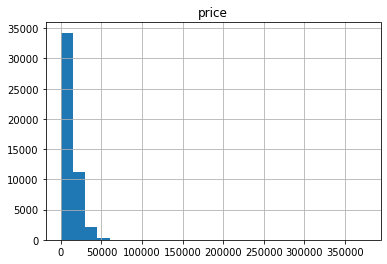

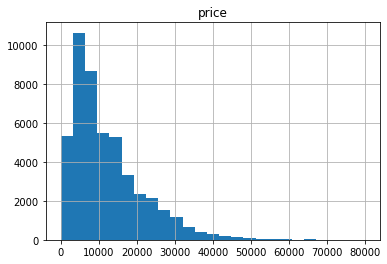

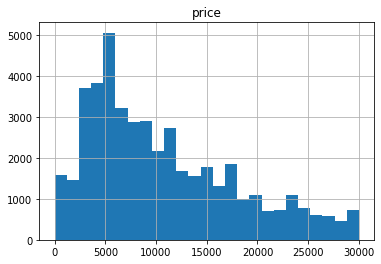

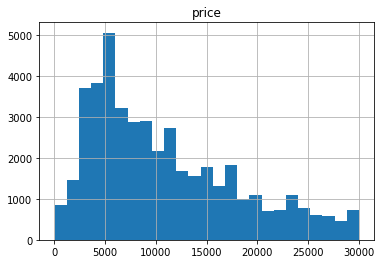

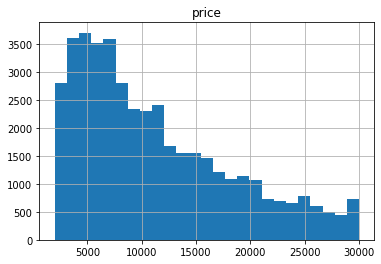

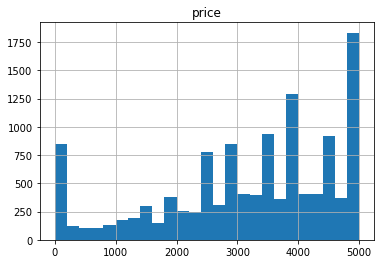

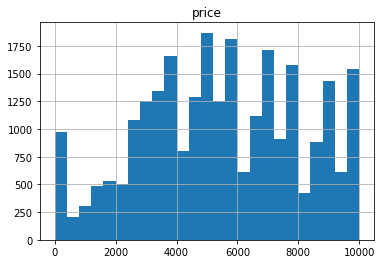

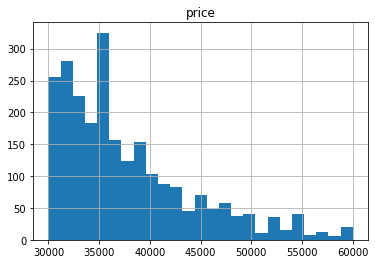

In [65]:
# studing price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition

vehicles_ads.hist('price', bins = 25)
vehicles_ads.hist('price', bins = 25, range = (0, 80000))

vehicles_ads.hist('price', bins = 25, range = (1, 30000))

vehicles_ads.hist('price', bins = 25, range = (10, 30000))

vehicles_ads.hist('price', bins = 25, range = (2000, 30000))

vehicles_ads.hist('price', bins = 25, range = (0, 5000))
vehicles_ads.hist('price', bins = 25, range = (0, 10000))

vehicles_ads.hist('price', bins = 25, range = (30000, 60000))



In [66]:
# looking at abnormally cheap vehicles
vehicles_ads.query('price <= 1000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
218,500,2004,toyota corolla,4,4,gas,157000,automatic,sedan,blue,0,2018-09-17,24,0,9,2018,14,11214
317,600,1999,toyota camry le,0,4,gas,216348,automatic,sedan,white,0,2019-03-04,23,0,3,2019,20,10817
332,500,2004,toyota corolla,4,4,gas,226980,automatic,sedan,unspecified,0,2018-09-19,19,2,9,2018,14,16212
405,1,2014,chevrolet camaro,3,6,gas,71310,automatic,coupe,unspecified,0,2018-07-14,29,5,7,2018,4,17827
406,288,2018,nissan altima,3,4,gas,40277,automatic,sedan,silver,0,2018-10-19,37,4,10,2018,1,40277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51253,1000,2002,jeep grand cherokee laredo,1,6,gas,175000,automatic,SUV,silver,1,2018-08-27,10,0,8,2018,16,10937
51256,1,2012,honda civic lx,3,4,gas,71262,automatic,sedan,blue,0,2018-05-06,53,6,5,2018,6,11877
51271,1000,2002,hyundai elantra,1,4,gas,250000,manual,hatchback,red,0,2018-10-08,17,0,10,2018,16,15625
51364,299,2004,toyota camry,3,4,gas,185234,automatic,sedan,silver,0,2018-12-09,5,6,12,2018,14,13231


In [67]:
# looking at abnormally cheap vehicles
vehicles_ads.query('price <= 500')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
218,500,2004,toyota corolla,4,4,gas,157000,automatic,sedan,blue,0,2018-09-17,24,0,9,2018,14,11214
332,500,2004,toyota corolla,4,4,gas,226980,automatic,sedan,unspecified,0,2018-09-19,19,2,9,2018,14,16212
405,1,2014,chevrolet camaro,3,6,gas,71310,automatic,coupe,unspecified,0,2018-07-14,29,5,7,2018,4,17827
406,288,2018,nissan altima,3,4,gas,40277,automatic,sedan,silver,0,2018-10-19,37,4,10,2018,1,40277
632,299,2004,toyota camry,3,4,gas,185234,automatic,sedan,silver,0,2018-08-12,42,6,8,2018,14,13231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50614,472,2006,gmc sierra 2500hd,2,8,diesel,151407,automatic,pickup,black,1,2018-07-15,44,6,7,2018,12,12617
50839,475,2018,gmc sierra 1500,4,8,gas,6500,automatic,truck,black,1,2018-07-10,18,1,7,2018,1,6500
50971,10,2012,toyota prius,3,4,hybrid,101000,automatic,hatchback,green,0,2019-03-16,29,5,3,2019,7,14428
51256,1,2012,honda civic lx,3,4,gas,71262,automatic,sedan,blue,0,2018-05-06,53,6,5,2018,6,11877


In [68]:
vehicles_ads.query('price > 50000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
188,52000,2008,ford f350 super duty,2,8,diesel,117500,automatic,truck,grey,1,2018-06-27,24,2,6,2018,10,11750
1309,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-03-02,56,5,3,2019,5,30249
1523,50948,2017,chevrolet silverado 2500hd,3,8,diesel,43076,automatic,pickup,black,1,2018-11-17,155,5,11,2018,1,43076
1587,51000,1967,chevrolet corvette,3,8,gas,66000,manual,coupe,blue,0,2019-02-14,95,3,2,2019,52,1269
1620,60774,2018,chevrolet tahoe,3,8,gas,4825,automatic,SUV,black,1,2018-07-04,10,2,7,2018,1,4825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50108,68000,2017,ford f-150,3,8,gas,30700,automatic,pickup,grey,1,2018-06-30,45,5,6,2018,1,30700
50113,66000,2018,ford f-250,5,8,diesel,22000,automatic,truck,white,1,2018-07-19,4,3,7,2018,1,22000
50664,76995,2018,cadillac escalade,3,8,gas,4500,other,SUV,white,1,2018-10-25,21,3,10,2018,1,4500
50671,58995,2017,chevrolet corvette,3,8,gas,5154,automatic,coupe,red,0,2018-07-11,77,2,7,2018,1,5154


In [69]:
vehicles_ads.query('price > 55000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
1309,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,black,0,2019-03-02,56,5,3,2019,5,30249
1620,60774,2018,chevrolet tahoe,3,8,gas,4825,automatic,SUV,black,1,2018-07-04,10,2,7,2018,1,4825
1668,189000,2014,ford f-150,2,6,gas,151248,automatic,truck,unspecified,0,2019-03-20,21,2,3,2019,5,30249
1688,55990,2018,chevrolet tahoe,3,8,gas,2451,automatic,SUV,grey,1,2018-11-04,9,6,11,2018,1,2451
1711,59589,2019,chevrolet silverado 2500hd,3,8,diesel,14151,automatic,truck,white,1,2019-01-13,0,6,1,2019,1,14151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50108,68000,2017,ford f-150,3,8,gas,30700,automatic,pickup,grey,1,2018-06-30,45,5,6,2018,1,30700
50113,66000,2018,ford f-250,5,8,diesel,22000,automatic,truck,white,1,2018-07-19,4,3,7,2018,1,22000
50664,76995,2018,cadillac escalade,3,8,gas,4500,other,SUV,white,1,2018-10-25,21,3,10,2018,1,4500
50671,58995,2017,chevrolet corvette,3,8,gas,5154,automatic,coupe,red,0,2018-07-11,77,2,7,2018,1,5154


In [70]:
# outliers are all values under 1000 and above 55000

# filtering by price

ads_filtered = vehicles_ads.query('1000 < price < 55000')

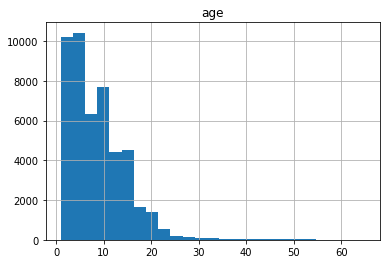

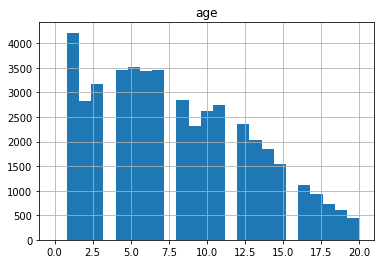

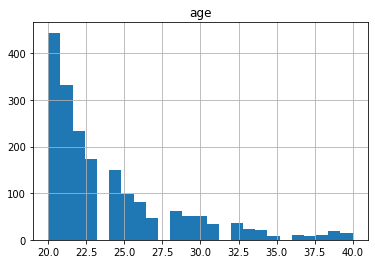

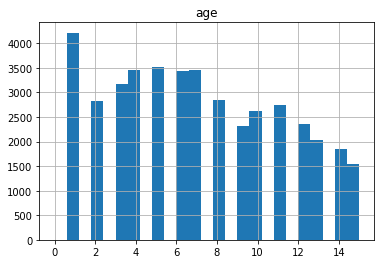

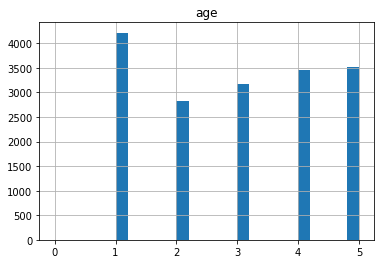

In [71]:
# looking vehicle's age by plotting histograms

vehicles_ads.hist('age', bins = 25)
vehicles_ads.hist('age', bins = 25, range = (0, 20))
vehicles_ads.hist('age', bins = 25, range = (20, 40))
vehicles_ads.hist('age', bins = 25, range = (0, 15))
vehicles_ads.hist('age', bins = 25, range = (0, 5))

# filtering by age under 30

ads_filtered = ads_filtered.query('age <=30')

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

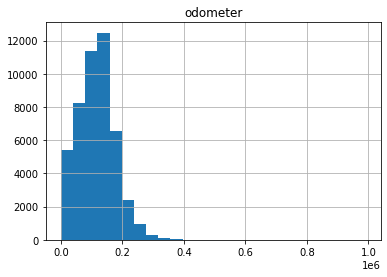

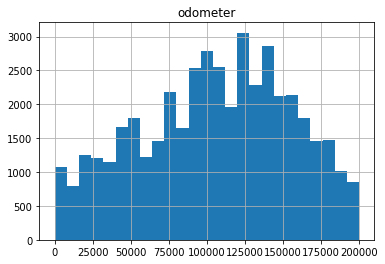

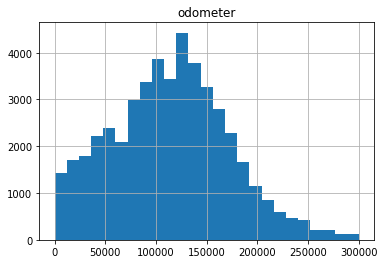

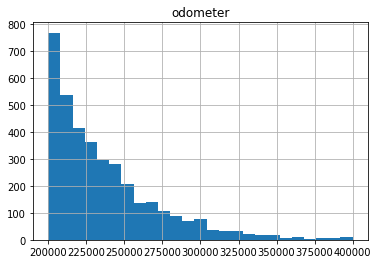

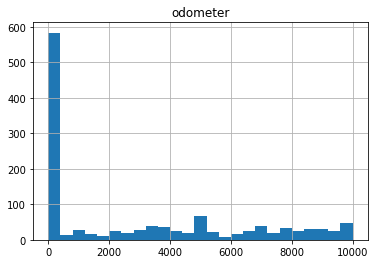

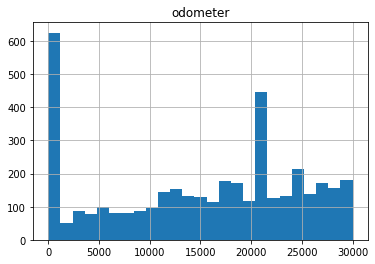

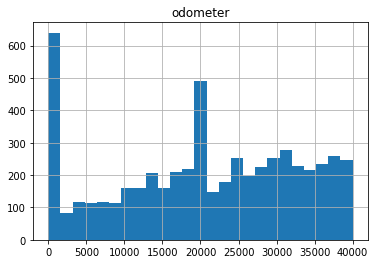

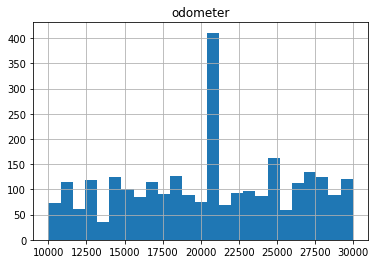

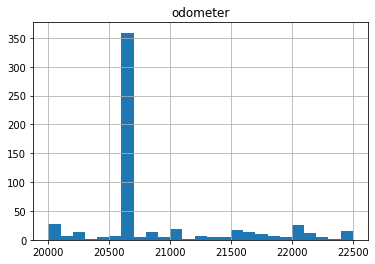

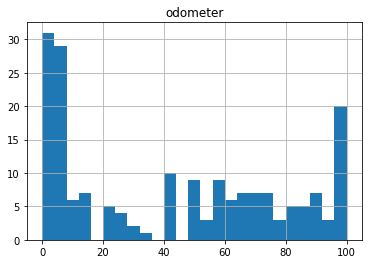

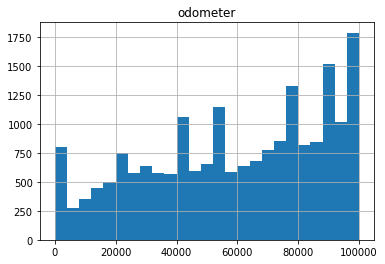

In [72]:
# looking vehicle's mileage by plotting histograms
vehicles_ads.hist('odometer', bins = 25)
vehicles_ads.hist('odometer', bins = 25, range  = (0, 200000))
vehicles_ads.hist('odometer', bins = 25, range  = (0, 300000))
vehicles_ads.hist('odometer', bins = 25, range  = (200000, 400000))
vehicles_ads.hist('odometer', bins = 25, range  = (0, 10000))
vehicles_ads.hist('odometer', bins = 25, range  = (0, 30000))
vehicles_ads.hist('odometer', bins = 25, range  = (0, 40000))
vehicles_ads.hist('odometer', bins = 25, range  = (10000, 30000))
vehicles_ads.hist('odometer', bins = 25, range  = (20000,22500 ))
vehicles_ads.hist('odometer', bins = 25, range  = (0, 100))
vehicles_ads.hist('odometer', bins = 25, range  = (0, 100000))

In [73]:
# checking abnormal values
display(vehicles_ads.query('odometer == 0'))
display(vehicles_ads.query('odometer < 500'))
display(vehicles_ads.query('5000 < odometer < 10000'))
display(vehicles_ads.query('1000 < odometer < 5000'))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
73,1900,1994,jeep grand cherokee laredo,2,6,gas,207,automatic,SUV,grey,1,2018-07-27,9,4,7,2018,24,8
222,2750,2006,honda civic lx,2,4,gas,200,manual,sedan,black,0,2018-07-06,41,4,7,2018,12,16
501,6300,2003,toyota rav4,3,4,gas,107,automatic,SUV,red,1,2018-09-16,24,6,9,2018,15,7
510,3900,2008,ford escape,2,4,gas,137,automatic,SUV,unspecified,0,2018-08-02,59,3,8,2018,10,13
621,7999,2010,honda accord,4,4,gas,91,automatic,sedan,silver,0,2018-07-23,18,0,7,2018,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51019,6995,2010,toyota prius,3,4,hybrid,114,automatic,hatchback,grey,0,2018-07-18,22,2,7,2018,8,14
51020,6995,2009,honda accord,3,4,gas,123,automatic,sedan,green,0,2019-03-02,67,5,3,2019,10,12
51252,5200,2007,toyota camry le,3,4,gas,102,automatic,sedan,silver,0,2018-12-21,17,4,12,2018,11,9
51328,22995,2009,gmc sierra 2500hd,3,8,gas,187,automatic,truck,black,1,2018-06-10,37,6,6,2018,9,20


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
110,28400,2017,ford mustang gt coupe 2d,2,8,gas,6665,other,coupe,blue,0,2018-05-16,46,2,5,2018,1,6665
150,28975,2017,chevrolet silverado 1500,3,8,gas,8354,automatic,truck,black,1,2019-01-07,13,0,1,2019,2,4177
254,23200,2018,chevrolet camaro lt coupe 2d,2,6,gas,7136,other,coupe,black,0,2018-08-18,25,5,8,2018,1,7136
285,41999,2018,ram 3500,2,6,diesel,5127,automatic,truck,black,0,2018-08-03,11,4,8,2018,1,5127
650,19000,2018,ford f150,4,8,gas,9400,automatic,truck,grey,1,2018-10-27,68,5,10,2018,1,9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,47995,2018,ford f-250 sd,2,8,diesel,7073,automatic,truck,silver,1,2018-08-03,23,4,8,2018,1,7073
51310,34995,2014,ford mustang,4,8,gas,7950,manual,coupe,black,0,2018-07-11,57,2,7,2018,4,1987
51376,27890,2018,ram 1500,3,8,gas,9446,automatic,truck,unspecified,1,2018-05-06,39,6,5,2018,1,9446
51447,33990,2019,ram 1500,3,8,gas,9000,automatic,truck,white,1,2019-01-25,36,4,1,2019,1,9000


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
111,29900,2018,ford mustang gt coupe 2d,2,8,gas,3827,automatic,coupe,yellow,0,2019-03-22,48,4,3,2019,1,3827
470,34000,2016,chevrolet camaro,5,8,gas,3396,automatic,coupe,red,0,2018-12-17,14,0,12,2018,2,1698
810,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,unspecified,0,2018-05-24,1,3,5,2018,2,2499
811,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,white,0,2019-03-02,52,5,3,2019,3,1666
830,29900,2018,ford mustang gt coupe 2d,2,8,gas,3827,automatic,coupe,yellow,0,2018-07-08,5,6,7,2018,1,3827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50512,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,white,0,2019-03-01,85,4,3,2019,3,1666
50607,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,unspecified,0,2018-12-03,36,0,12,2018,2,2499
50664,76995,2018,cadillac escalade,3,8,gas,4500,other,SUV,white,1,2018-10-25,21,3,10,2018,1,4500
50738,21900,2016,nissan frontier crew cab sv,2,6,gas,4998,other,pickup,white,0,2018-11-22,28,3,11,2018,2,2499


In [74]:
#looking at rows with mileage values equal to a peak between 20500 and 20700 
vehicles_ads.query(' 20500 < odometer < 20700')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year
108,24200,2018,chevrolet camaro lt coupe 2d,2,6,gas,20627,other,coupe,grey,0,2018-07-20,57,4,7,2018,1,20627
261,20675,2018,ford escape,2,4,gas,20627,automatic,SUV,black,1,2018-09-29,30,5,9,2018,1,20627
558,9900,2018,nissan versa,3,4,gas,20627,automatic,sedan,silver,0,2019-01-03,56,3,1,2019,1,20627
645,21950,2018,chevrolet camaro,4,4,gas,20627,automatic,coupe,blue,0,2019-03-05,19,1,3,2019,1,20627
680,39900,2018,ford f-250 super duty,3,8,gas,20627,automatic,truck,black,1,2018-05-31,24,3,5,2018,1,20627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50628,22500,2018,nissan frontier crew cab sv,2,6,gas,20627,other,pickup,unspecified,1,2018-11-16,59,4,11,2018,1,20627
51084,29995,2018,chevrolet silverado 1500,3,6,gas,20627,automatic,truck,custom,1,2019-01-01,25,1,1,2019,1,20627
51162,22990,2018,nissan frontier,3,8,gas,20627,automatic,truck,unspecified,1,2019-02-13,56,2,2,2019,1,20627
51324,18995,2018,dodge grand caravan,5,6,gas,20627,automatic,mini-van,grey,0,2018-06-20,60,2,6,2018,1,20627


In [75]:
# outliers in 'odometer' are  all values under 5000 and above 300 000

# filtering by mileage 

ads_filtered = ads_filtered.query('5000 < odometer < 300000')


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

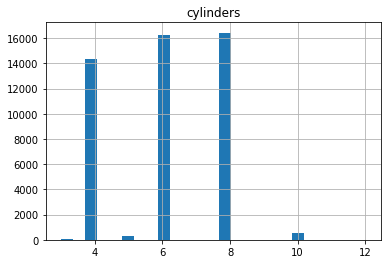

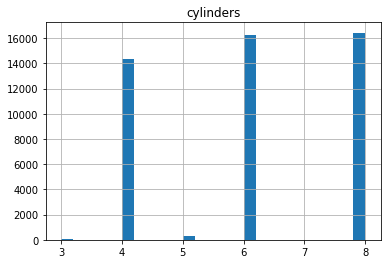

In [76]:
# looking at engine's cylinders number values distribution by plotting a histograms
vehicles_ads.hist('cylinders', bins = 25)
vehicles_ads.hist('cylinders', bins = 25, range = (3,8))


array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

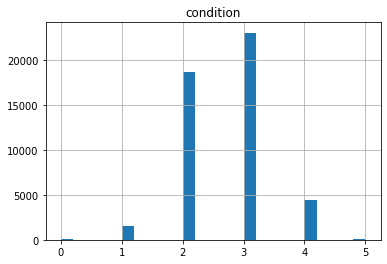

In [77]:
# looking at vehicle's condition values distribution by plotting a histograms
vehicles_ads.hist('condition', bins = 25)

Text(0, 0.5, 'number of ads')

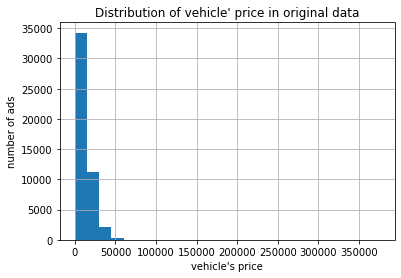

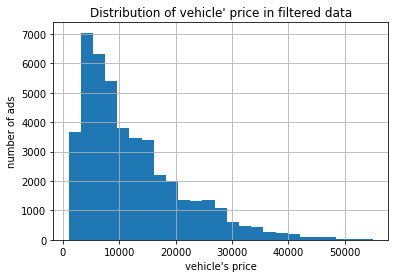

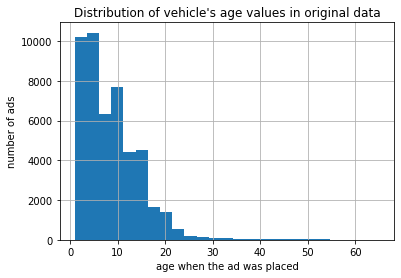

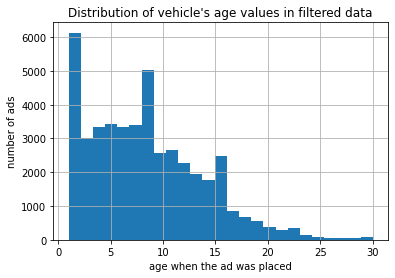

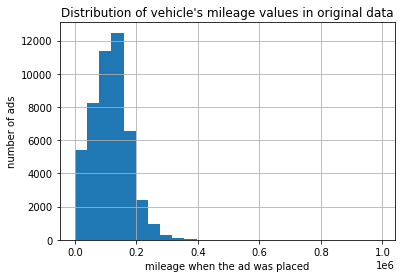

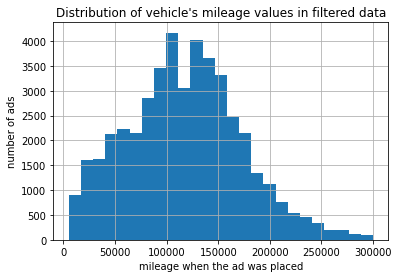

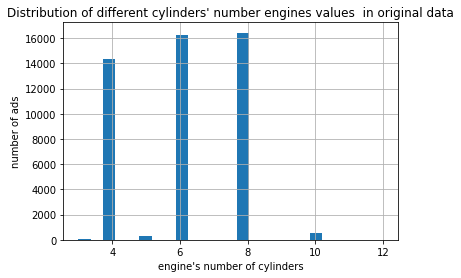

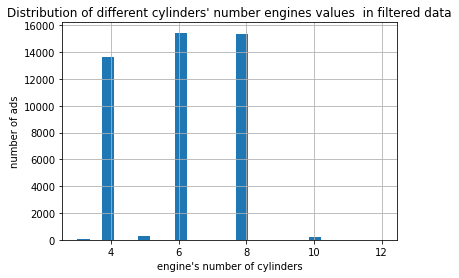

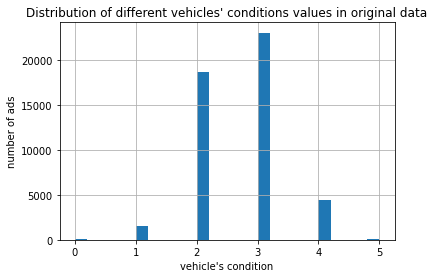

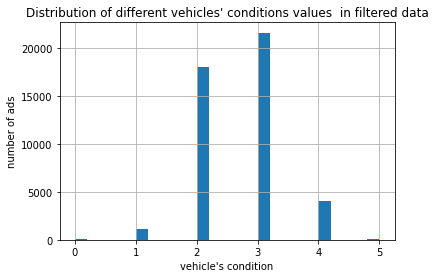

In [78]:
# comparing final results with the older ones

vehicles_ads.hist('price', bins = 25)
plt.title ("Distribution of vehicle' price in original data")
plt.suptitle("")
plt.xlabel("vehicle's price")
plt.ylabel('number of ads')


ads_filtered.hist('price', bins = 25)
plt.title ("Distribution of vehicle' price in filtered data")
plt.suptitle("")
plt.xlabel("vehicle's price")
plt.ylabel('number of ads')


vehicles_ads.hist('age', bins = 25)
plt.title ("Distribution of vehicle's age values in original data")
plt.suptitle("")
plt.xlabel("age when the ad was placed")
plt.ylabel('number of ads')


ads_filtered.hist('age', bins = 25)
plt.title ("Distribution of vehicle's age values in filtered data")
plt.suptitle("")
plt.xlabel("age when the ad was placed")
plt.ylabel('number of ads')

vehicles_ads.hist('odometer', bins = 25)
plt.title ("Distribution of vehicle's mileage values in original data")
plt.suptitle("")
plt.xlabel("mileage when the ad was placed")
plt.ylabel('number of ads')

ads_filtered.hist('odometer', bins = 25)
plt.title ("Distribution of vehicle's mileage values in filtered data")
plt.suptitle("")
plt.xlabel("mileage when the ad was placed")
plt.ylabel('number of ads')


vehicles_ads.hist('cylinders', bins = 25)
plt.title ("Distribution of different cylinders' number engines values  in original data")
plt.suptitle("")
plt.xlabel("engine's number of cylinders")
plt.ylabel('number of ads')

ads_filtered.hist('cylinders', bins = 25)
plt.title ("Distribution of different cylinders' number engines values  in filtered data")
plt.suptitle("")
plt.xlabel("engine's number of cylinders")
plt.ylabel('number of ads')


vehicles_ads.hist('condition', bins = 25)
plt.title ("Distribution of different vehicles' conditions values in original data")
plt.suptitle("")
plt.xlabel("vehicle's condition")
plt.ylabel('number of ads')

ads_filtered.hist('condition', bins = 25)
plt.title ("Distribution of different vehicles' conditions values  in filtered data")
plt.suptitle("")
plt.xlabel("vehicle's condition")
plt.ylabel('number of ads')


##### Task 1 conclusions

A. Finding outliers 

We have plotted histograms for price, age, milleage, number of cylinders and condition and found that there are followong outliers: 

1. Price values. 

There were too low values (close 0) and their number was signficant compare to number of other values lower 4000. So we considered them as 'abnormal'. Also we found that between the values under 1000 there are many  other  irrealistic values (such as 300 for a car which is normally advertised for around 30 000). The cars at the price above 55 000 also seem to be outliers, so we decided to filter our data from them  as well.

2. Age values.

We have found that age values above 30 years are  outliers compare to other values, because it was a rare case. So we have filtered the data from them.

3. Mileage values. 

As within price values we  have found many abnormally low values and  we have found that the most of values are ditributed within 5000 and 300 000. At the same time, we found that values under 5000 seem to be corrupted: there are many old cars, so these data is likely to be rubbish. So we decided to filter the data from the irrealistic and outliers values under 5000 and above 300 000.   

4. Cylinders values. 

We have found that the most popular engines are those (in descending order) with 8, 6 and 4 cylinders, while the other are outliers. But in fact, for the goal of our analysis we need them as well: we need to understand how different factors affect the price, and these values are more like categorical, than quantative. So these values will be necessary to keep. That's why we didn't remove them from the data. 

5. Condition values. 
We have found the all 'condition' values except 3 (excellent), 2 (good) and 4(like new) are outliers. But as these values are categorical we didn't delete them as well: we need them for our analysis. 

After having filtered the data we have plotted the new histograms. Our new fundings are: 

B. Comparing histograms based on original data and filtered data.

1. Price values.

Before removing the outliers the histogram showing distribution of prices was not very "readable". We might  only say that it seemed to be left positioned, i.e. cheaper cars prevailed.  After removing the outliers we clearly see that there is a peak between 5000 and 10 000, and after that peak the values smoothly distributed. It looks like reality: the more expensive a car, the more rare it is. 


2. Age values. 

Before removing the outliers we could only say that there are more newer vehiclesm, than old ones. After removing the outliers we see  that there is a high peak at the new cars, a smaller peak around 8-9 years and another peak at 16 years.  Between them there's a core between 3 and 8-9 years and then the number of ads is decreasing with the age. It seems completely normal: the older a card the more chances that it goes to a recycling plunt. 

3. Mileage values.

After removing the outliers the histogram became a little bitmore 'centered': we se that the most of vehicles were sold with milleage within 75 000 and 160 000.   

4. Cylinders values. 

After removing the outliers nothin is significantly changed, so it proves that we didn't a mistake when removing the outliers


5. Condition values. 

The same as above, nothing is changed after removing the outliers, so it also proves our decisions.



#### Task 2: studying ads lifetime

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

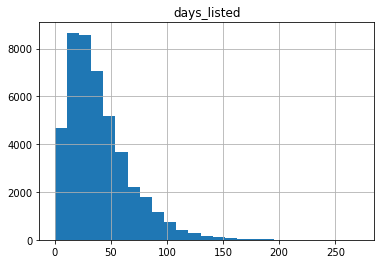

In [79]:
#looking at general distributuion 

ads_filtered.hist('days_listed', bins = 25)

In [80]:
#calculating mean and median with describe()
ads_filtered['days_listed'].describe()

count    44984.000000
mean        39.590699
std         28.236247
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

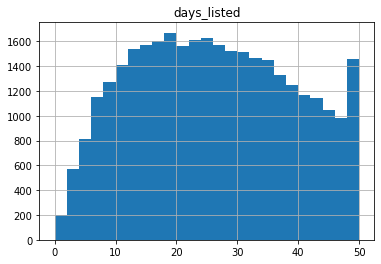

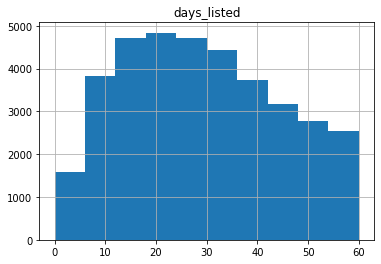

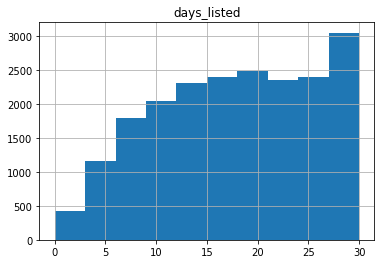

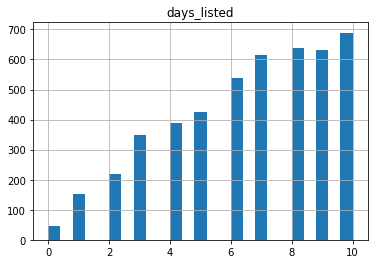

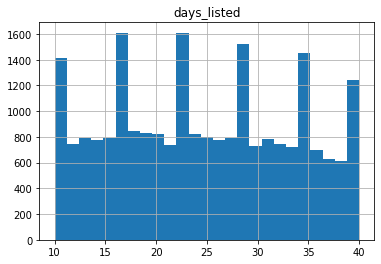

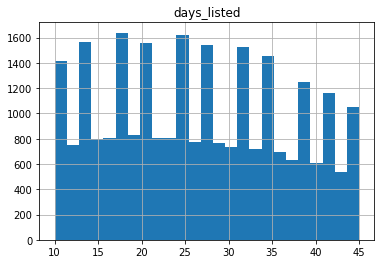

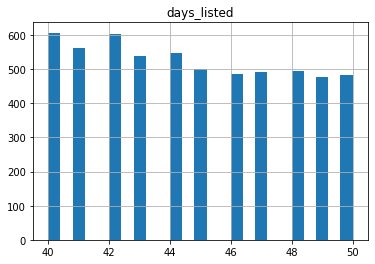

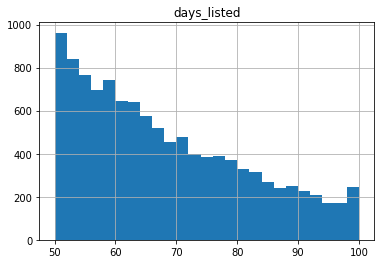

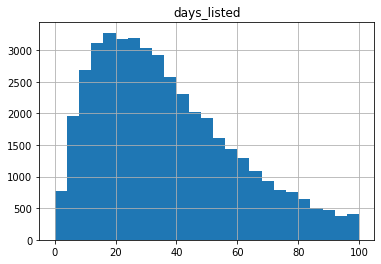

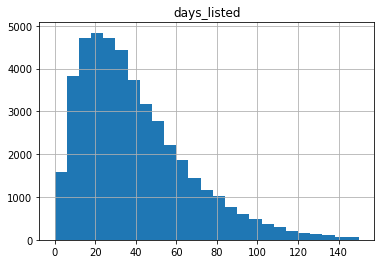

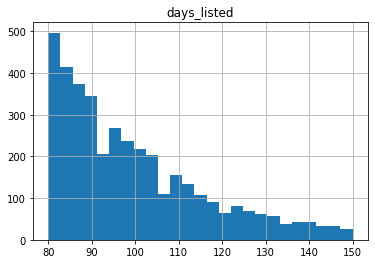

In [81]:
#zooming in 'days_listed' values distribution by changing the range
ads_filtered.hist('days_listed', bins = 25, range = (0,50))
ads_filtered.hist('days_listed', bins = 10, range = (0,60))
ads_filtered.hist('days_listed', bins = 10, range = (0,30))
ads_filtered.hist('days_listed', bins = 25, range = (0,10))
ads_filtered.hist('days_listed', bins = 25, range = (10,40))
ads_filtered.hist('days_listed', bins = 25, range = (10,45))
ads_filtered.hist('days_listed', bins = 25, range = (40,50))
ads_filtered.hist('days_listed', bins = 25, range = (50,100))
ads_filtered.hist('days_listed', bins = 25, range = (0,100))
ads_filtered.hist('days_listed', bins = 25, range = (0,150))
ads_filtered.hist('days_listed', bins = 25, range = (80,150))

##### Task 2 conclusions 

In order to study ads lifetime  we first  plotted the general histogram showing ads lifetime distribution values ('days_displayed' column in our dataset). We saw that the bins on the left were mostly higher than on the right. We calculated then mean and median values. The mean was 39 days, while the median was only 33 days. So it means that there are high values outliers which affect the mean value.  We then further plotted several histograms with different ranges and bins numbers to see better what the distribution was.  

We have found that the most of the ads were displayed within period from 10 up 40 days. There were also ads which were displayed for a shorter period (less than 5 days and even 0 days), but we would say that it seems to be rather abnormal. At the same time a display period for more than 40 days was normally less common than a shorter one. Finally, we found that there were not so many ads displayed for more than 120 days, so these examples are outliers. 


#### Task 3 : Comparing different vehicle types, their average price and number of ads.

In [82]:
#making a pivot table showing average price and the number of ads for each type of a vehicle 

types_pivot = ads_filtered.pivot_table(index = 'type', values = ['price'], aggfunc = ['mean', 'count'])

#renaming columns for convenience 

types_pivot.columns = ['average_price', 'ads_number']

#sorting values to see what are the most popular types
types_pivot.sort_values(by = 'ads_number', ascending = False)



,average_price,ads_number
type,,
SUV,11473.643133,10864
truck,16959.686131,10823
sedan,7227.225339,10624
pickup,16191.715859,6173
coupe,14261.905338,1817
wagon,9302.768786,1384
mini-van,8183.941176,1037
hatchback,7103.487859,906
van,10748.520572,559


In [83]:
#sorting values to see what are the most expensive types
types_pivot.sort_values(by = 'average_price', ascending = False)

,average_price,ads_number
type,,
bus,17135.666667,24
truck,16959.686131,10823
pickup,16191.715859,6173
offroad,14557.092784,194
coupe,14261.905338,1817
convertible,12526.614085,355
SUV,11473.643133,10864
other,10759.540179,224
van,10748.520572,559


Text(0, 0.5, 'number of ads in the relevant category')

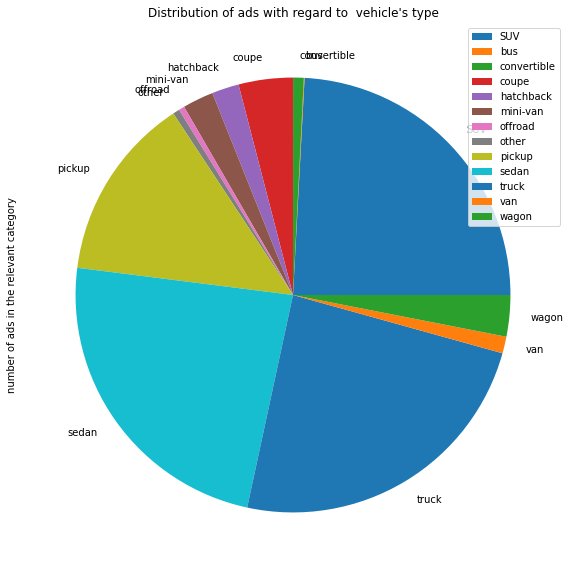

In [84]:
# plotting a graph showing the dependence of the number of ads and the type of vehicle

types_pivot.plot( x = 'type', y ='ads_number', kind = 'pie', figsize = (10, 10))
plt.title ("Distribution of ads with regard to  vehicle's type")
plt.suptitle("")
plt.ylabel("number of ads in the relevant category")

Text(0, 0.5, 'number of ads in the relevant category')

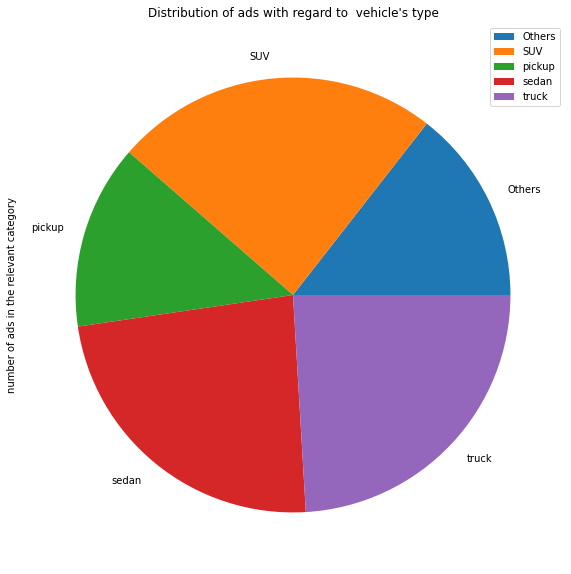

In [85]:
# making the plot more readable 

# groupping types of a vehicle by number of ads,  type is popular if the number of ads >= 6173

popular_types = types_pivot.query('ads_number >= 6173')

# categorizing type as 'type', if it's popular and 'Others' if it's not

ads_filtered['group_type'] = ads_filtered['type'].where(ads_filtered['type'].isin(popular_types.index), 'Others')

# plotting new histogram

type_group_pivot = ads_filtered.pivot_table(index = 'group_type', values = 'price', aggfunc = 'count')

type_group_pivot.columns = ['ads_number']

type_group_pivot. plot(y ='ads_number', kind = 'pie', figsize = (10, 10))

plt.title ("Distribution of ads with regard to  vehicle's type")
plt.suptitle("")
plt.ylabel("number of ads in the relevant category")

##### Task 3 conclusions

We have found that the most popular vehicle types were the vehicle types for those there were more than 6173 ads in previous years. These were (in descending order): 

1. SUV 	 	(number of ads: 10864)
2. truck 	(number of ads: 10823)
3. sedan 	(number of ads: 10624)
4. pickup 	(number of ads: 6173)


The number of ads for other types were significantly lower: from 1817 (coupe)  to 24 ads(bus). So the first 4 represent the majority of vehicles' types.  The top 2 are 'SUV' and 'truck'.

The average price leaders were different. Here are top five: 

1. bus 	    (av. price: 17135)
2. truck 	(av. price: 16959)
3. pickup 	(av. price: 16191)
4. offroad 	(av. price: 14557)
5. coupe 	(av. price: 14261)	

Notwithstanding  the average price values differ not that significantly as the numbers of ads (, there are also outliers: the average price for a sedan is 7227, the cheapest car is hatchback (7103).  

So sedan is almost the cheapest car and one of the most popular. A SUV costs around 11473. Almost 2 times more expensive than an average sedan. But at the same time it's even a little bit more popular, so...people love SUVs! 


#### Task 4:  Vehicle price's dependence on age, mileage, condition, transmission type, and color.

In [86]:
# creating dataframes by filtering by popular types

ads_suv = ads_filtered.query('type == "SUV"')

ads_truck = ads_filtered.query('type == "truck"')


Correlation of price and age for SUV category: -0.6516051270219687
Correlation of price and age for Truck category: -0.722710316587667


Text(0, 0.5, 'price')

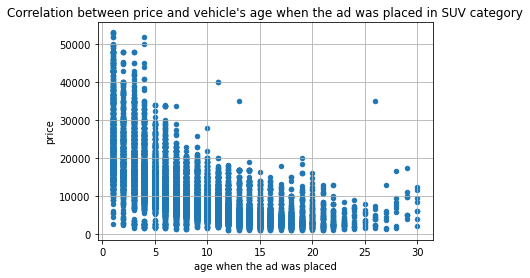

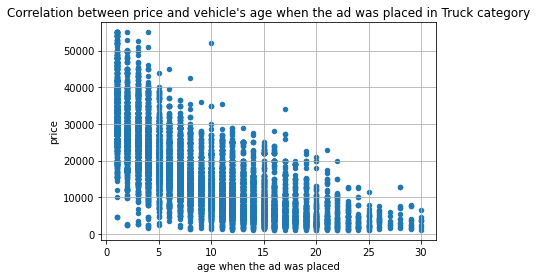

In [87]:
# calculating correlation and making plots showing correlation between price and age

print ("Correlation of price and age for SUV category:", ads_suv['age'].corr(ads_suv['price']))
print ("Correlation of price and age for Truck category:", ads_truck['age'].corr(ads_truck['price']))

ads_suv.plot(x='age', y = 'price', kind = 'scatter', grid = True)
plt.title ("Correlation between price and vehicle's age when the ad was placed in SUV category")
plt.suptitle("")
plt.xlabel("age when the ad was placed")
plt.ylabel("price")

ads_truck.plot(x='age', y = 'price', kind = 'scatter', grid = True)
plt.title ("Correlation between price and vehicle's age when the ad was placed in Truck category")
plt.suptitle("")
plt.xlabel("age when the ad was placed")
plt.ylabel("price")

Correlation of price and mileage for SUV category: -0.6592792058053168
Correlation of price and mileage for Truck category: -0.6323591861933456


Text(0, 0.5, 'price')

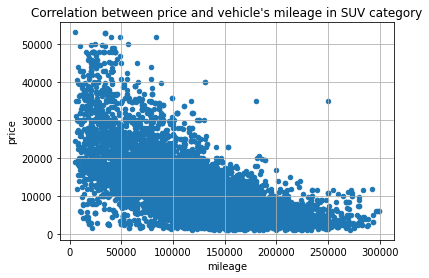

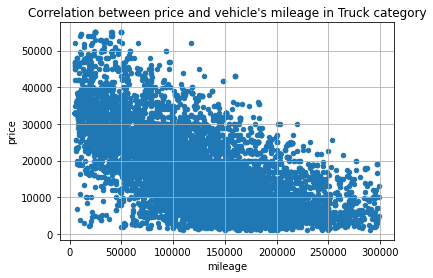

In [88]:
# calculating correlation and making plots showing correlation between price and mileage

print ("Correlation of price and mileage for SUV category:", ads_suv['odometer'].corr(ads_suv['price']))
print ("Correlation of price and mileage for Truck category:", ads_truck['odometer'].corr(ads_truck['price']))


ads_suv.plot(x='odometer', y = 'price', kind = 'scatter', grid=True)
plt.title ("Correlation between price and vehicle's mileage in SUV category")
plt.suptitle("")
plt.xlabel("mileage")
plt.ylabel("price")

ads_truck.plot(x='odometer', y = 'price', kind = 'scatter', grid=True)
plt.title ("Correlation between price and vehicle's mileage in Truck category")
plt.suptitle("")
plt.xlabel("mileage")
plt.ylabel("price")


Correlation of price and condition for SUV category: 0.2852711881225732
Correlation of price and condition for Truck category: 0.364053404736075


Text(0.5, 0, "vehicle's condition")

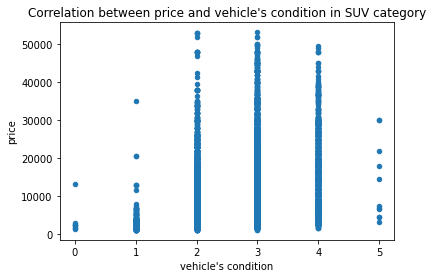

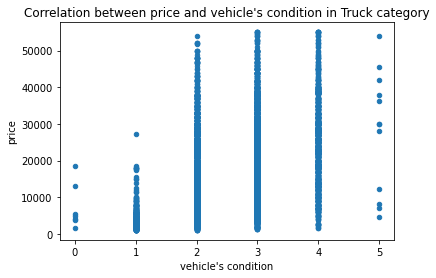

In [89]:
# calculating correlation and making plots showing correlation between price and condition

print ("Correlation of price and condition for SUV category:", ads_suv['condition'].corr(ads_suv['price']))
print ("Correlation of price and condition for Truck category:", ads_truck['condition'].corr(ads_truck['price']))

ads_suv.plot(x='condition', y = 'price', kind = 'scatter')
plt.title ("Correlation between price and vehicle's condition in SUV category")
plt.suptitle("")
plt.ylabel("price")
plt.xlabel("vehicle's condition")

ads_truck.plot(x='condition', y = 'price', kind = 'scatter')
plt.title ("Correlation between price and vehicle's condition in Truck category")
plt.suptitle("")
plt.ylabel("price")
plt.xlabel("vehicle's condition")

<AxesSubplot:xlabel='price', ylabel='condition'>

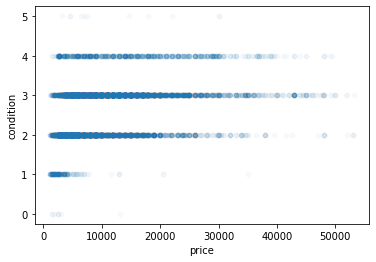

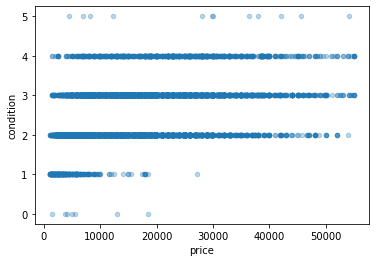

In [90]:
# trying other histograms
ads_suv.plot(x='price', y = 'condition', kind = 'scatter', alpha = 0.03)
ads_truck.plot(x='price', y = 'condition', kind = 'scatter', alpha =0.3)

In [91]:
# studying price's dependence on transmission and color

# checking whether number of values > 50 

display(ads_suv['transmission'].value_counts())
display(ads_suv['paint_color'].value_counts())
display(ads_truck['transmission'].value_counts())
display(ads_truck['paint_color'].value_counts())


automatic    10329
manual         449
other           86
Name: transmission, dtype: int64

unspecified    1960
black          1939
white          1728
silver         1369
grey           1055
blue            911
red             811
green           371
brown           315
custom          255
orange           72
yellow           42
purple           36
Name: paint_color, dtype: int64

automatic    10362
manual         381
other           80
Name: transmission, dtype: int64

white          3268
unspecified    1863
black          1344
red             950
silver          923
grey            851
blue            778
custom          275
green           238
brown           212
yellow           60
orange           46
purple           15
Name: paint_color, dtype: int64

In [92]:
# filtering data from category values which don't have at least 50 ads 

suv_color_outlier = ['yellow, purple'] 

suv_pop_color = (ads_suv.pivot_table(index = 'paint_color', values = 'price', aggfunc = 'count')
                 .query('price >50')
                 )

truck_pop_color = (ads_truck.pivot_table(index = 'paint_color', values = 'price', aggfunc = 'count')
                    .query('price >50')
                  )

ads_suv_filtered = ads_suv.query('paint_color in @suv_pop_color.index')
ads_truck_filtered = ads_truck.query('paint_color in @truck_pop_color.index')

# checking results
display(ads_suv_filtered['paint_color'].value_counts())
display(ads_truck_filtered['paint_color'].value_counts())


unspecified    1960
black          1939
white          1728
silver         1369
grey           1055
blue            911
red             811
green           371
brown           315
custom          255
orange           72
Name: paint_color, dtype: int64

white          3268
unspecified    1863
black          1344
red             950
silver          923
grey            851
blue            778
custom          275
green           238
brown           212
yellow           60
Name: paint_color, dtype: int64

Text(0, 0.5, 'price')

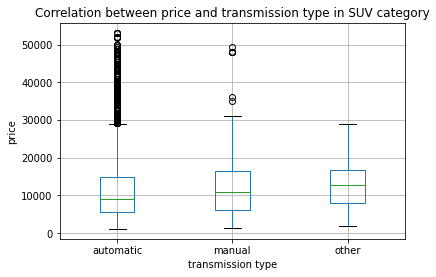

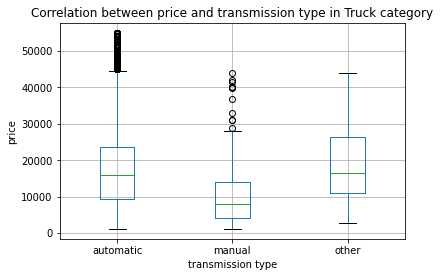

In [93]:
# making box-plot with whiskers to study correlation between the price and transmission type


ads_suv.boxplot(column = 'price', by = 'transmission' , return_type = 'axes')
plt.title ("Correlation between price and transmission type in SUV category")
plt.suptitle("")
plt.xlabel("transmission type")
plt.ylabel("price")


ads_truck.boxplot(column = 'price', by = 'transmission' , return_type = 'axes')
plt.title ("Correlation between price and transmission type in Truck category")
plt.suptitle("")
plt.xlabel("transmission type")
plt.ylabel("price")



unspecified    1960
black          1939
white          1728
silver         1369
grey           1055
blue            911
red             811
green           371
brown           315
custom          255
orange           72
Name: paint_color, dtype: int64

white          3268
unspecified    1863
black          1344
red             950
silver          923
grey            851
blue            778
custom          275
green           238
brown           212
yellow           60
Name: paint_color, dtype: int64

Text(0, 0.5, 'price')

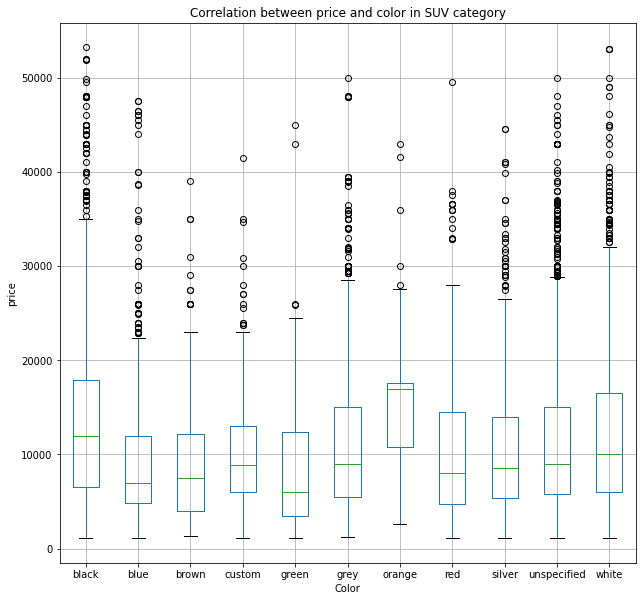

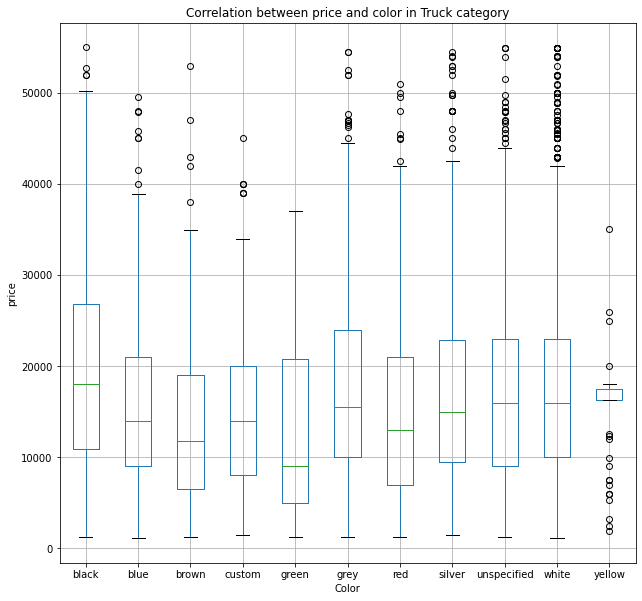

In [94]:
# looking once again at value counts 

display(ads_suv_filtered['paint_color'].value_counts())
display(ads_truck_filtered['paint_color'].value_counts())


# making box-plot with whiskers to study correlation between the price and color

ads_suv_filtered.boxplot(column = 'price', by = 'paint_color' , return_type = 'axes', figsize= (10,10))
plt.title ("Correlation between price and color in SUV category")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("price")

ads_truck_filtered.boxplot(column = 'price', by = 'paint_color' , return_type = 'axes', figsize= (10,10))
plt.title ("Correlation between price and color in Truck category")
plt.suptitle("")
plt.xlabel("Color")
plt.ylabel("price")


In [95]:
ads_filtered.query('transmission == "manual" and type == "SUV"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year,group_type
52,3300,2011,kia soul,2,4,gas,188963,manual,SUV,black,0,2019-02-16,71,5,2,2019,8,23620,SUV
185,6500,2009,hyundai santa fe,2,6,gas,98000,manual,SUV,unspecified,0,2019-03-18,27,0,3,2019,10,9800,SUV
417,21900,2017,jeep wrangler unlimited,2,6,gas,37873,manual,SUV,blue,1,2018-06-07,15,3,6,2018,1,37873,SUV
434,47995,2018,jeep wrangler unlimited,2,6,gas,22824,manual,SUV,black,1,2018-05-07,21,0,5,2018,1,22824,SUV
527,19988,2011,jeep wrangler,2,6,gas,116049,manual,SUV,white,1,2018-10-26,13,4,10,2018,7,16578,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50965,7900,2001,jeep wrangler,3,4,gas,231089,manual,SUV,yellow,1,2018-08-15,44,2,8,2018,17,13593,SUV
51014,7000,1990,jeep wrangler,2,6,gas,131000,manual,SUV,red,1,2018-12-06,49,3,12,2018,28,4678,SUV
51095,18000,2010,jeep wrangler,2,6,gas,82987,manual,SUV,unspecified,1,2019-02-05,32,1,2,2019,9,9220,SUV
51098,16488,2012,jeep wrangler,2,6,gas,71194,manual,SUV,unspecified,1,2018-06-19,10,1,6,2018,6,11865,SUV


In [96]:
display (ads_filtered.query('paint_color == "orange"'))
ads_filtered.query('paint_color == "yellow" and type == "truck"')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year,group_type
28,29800,2012,chevrolet corvette,3,8,gas,57413,automatic,coupe,orange,0,2018-10-22,101,0,10,2018,6,9568,Others
151,14995,2011,jeep wrangler,3,6,gas,118371,automatic,SUV,orange,1,2019-01-25,49,4,1,2019,8,14796,SUV
325,2200,1995,ford f250 super duty,2,8,gas,149963,automatic,truck,orange,0,2018-05-01,59,1,5,2018,23,6520,truck
947,23000,2014,ford f150 supercrew cab xlt,2,6,gas,77994,other,pickup,orange,1,2018-09-21,17,4,9,2018,4,19498,pickup
1255,27700,2015,ram 3500,3,6,diesel,137859,automatic,other,orange,1,2018-08-22,42,2,8,2018,3,45953,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50110,36000,2015,toyota 4runner,4,6,gas,39000,automatic,SUV,orange,1,2018-07-25,22,2,7,2018,3,13000,SUV
50152,3500,2006,ford f250,3,8,gas,275000,automatic,truck,orange,0,2018-11-27,26,1,11,2018,12,22916,truck
50872,15995,2011,jeep wrangler,3,6,gas,118371,automatic,SUV,orange,1,2019-01-16,11,2,1,2019,8,14796,SUV
51303,29800,2012,chevrolet corvette,3,8,gas,57413,automatic,coupe,orange,0,2018-10-10,60,2,10,2018,6,9568,Others


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,age,mileage_per_year,group_type
348,1900,1999,ford ranger,3,6,gas,191135,automatic,truck,yellow,1,2018-08-02,26,3,8,2018,19,10059,truck
2521,17990,2016,ford econoline,2,8,gas,122637,automatic,truck,yellow,0,2018-11-01,51,3,11,2018,2,61318,truck
2527,17990,2016,ford econoline,2,8,gas,122974,automatic,truck,yellow,0,2018-05-22,52,1,5,2018,2,61487,truck
2891,5295,2002,ford ranger,3,6,gas,170668,automatic,truck,yellow,1,2018-05-01,79,1,5,2018,16,10666,truck
3008,17490,2016,ford econoline,2,10,gas,122974,automatic,truck,yellow,0,2018-12-30,42,6,12,2018,2,61487,truck
5342,17990,2016,ford econoline,2,10,gas,122637,automatic,truck,yellow,0,2019-02-17,26,6,2,2019,3,40879,truck
5454,17490,2016,ford econoline,2,10,gas,54000,automatic,truck,yellow,0,2018-05-17,94,3,5,2018,2,27000,truck
6181,17490,2016,ford econoline,2,10,gas,122637,automatic,truck,yellow,0,2018-12-07,81,4,12,2018,2,61318,truck
6226,17490,2016,ford econoline,2,10,gas,122974,automatic,truck,yellow,0,2018-05-01,11,1,5,2018,2,61487,truck
7184,25995,2018,chevrolet colorado,2,6,gas,32689,automatic,truck,yellow,0,2018-07-25,7,2,7,2018,1,32689,truck


##### Task 4 conclusions

- We have taken two most popular vehicle categories (SUVs and Trucks) and studied correlation of vehicle's price and other factors (age, mileage, condition, transmission type, and color). 

- We have made scatterplots and calculated Pearson's correlation coefficient between vehicle's price and age, mileage, condition parameters and we have made box-plots with whiskers to find out if there is any correlation between price and transmission type and price and vehicle's color. 

Here are our fundings.

1. Correlation between vehicle's price and vehicle's age. 

We have found that there is  a negative correlation between price and age in both categories. These are Pearson's correlation coefficients: 

- Correlation of price and age for SUV category: -0.651605127021968
- Correlation of price and age for Truck category: -0.7227103165876673


As we see, the correlation seems to be quite signifanct. Age affects the price for sure. 

When we see at the scutterplots showing this correlation, we find it that the correlation is relatively low between vehicle's age from 0 to 4 years, but then it becomes more significant: the older a vehicle, the lower its price. 

2. Correlation between vehicle's price and vehicle's mileage.

We have found that there is  a negative correlation between price and mileage in both categories. These are Pearson's correlation coefficients: 


- Correlation of price and mileage for SUV category: -0.6592792058053171
- Correlation of price and mileage for Truck category: -0.6323591861933455


We see that the correlation coefficients are almost equal. But if see at the relevant scatterplots we that there is a difference: 
- correlation between price and mileage in the SUV category is relatively low for mileage under 50 000 and relatively high  when the mileage is  above 50 000,
- correlation between price and mileage in the Truck category is relatively low for mileageunder 100 000 and relatively higher when the mileage is above 100 000. 

This difference seems to be normal: trucks are normally used more than SUVs. So it's normal that the price depends less on the mileage than in the case of SUV. 

3. Correlation between vehicle's price and vehicle's condition


We have found that there is a positive correlation between vehicle's price and vehicle's condition in both categories. The Pearson's correlation coefficient are the following: 


- Correlation of price and condition for SUV category: 0.28527118812257307
- Correlation of price and condition for Truck category: 0.3640534047360754


These numbers seem to be not something significant. But if we see at the scatterplots, we find it that  in both catefories the correlation is low only when the condition varies from 2 to 4 (from 'good' to 'like new'), but in the case of 1 ('fair') and 0 ('salvage') the dependence is significant: only cheap vehicles were sold in these condition. Data with regard to the condition 5 ('new') seems to be not very reliable: there were a few vehicles in this condition, so we can't definitely say if there is a correlation. 


4. Correlation between vehicle's price and type of transmission. 


When we have the first look at the  box-plot showing distribution of prices within different types of transmission we have impression, that in SUV category the vehicles with manual transmission and "other' transmissions' normally cost more expensive. But in fact the reason of this picture that the number of vehicles with automatic transmission (10329) exceeds many the number of those with manual transmission (449) and other (86). So, within automatic transmission cars there are lot of different cars: cheap and expenssive. It's just more popular, that's why it looks like they are "cheaper". The manual transmissions and "other" are installed on a minority of cars, they are more "specific" (like Jeep Wrangler), so there is less cheap models in this category. 

At the same time we see that there is a slight correlation between the price and type of transmission in the Truck category. The vehicles with manual transmission cost cheaper than those with automatic transmission and 'others'. it seems to be a correct conclusion, because the number of automatic transmission cars in this category exceeds many times the number of manual transmission cars, so it is certain not an anomaly



5. Correlation between vehicle's price and vehicle's color. 

We cannot say that there is a significant correlation between color and price in both categories, but at the same time we have found some insights. 

- In SUV category there are three most popular colors: black (1939 ads), white (1728 ads), silver (1369 ads). We see that silver and grey cars tend to be a little bit cheaper than the other two. At the same time the most expensive cars are orange cars. It may be explained by the fact that grey and silver colors are more repesented in cheaper models, while black and white cars are popular colors within all models. The same explanation works for orange cars: they are rare, they are very specific and normally preferred by people who like to be different. These people generally prefer expensive cars. 

The fact that the majority of SUV ads the color was not specified proves indirectly that there is no significant correlation: for an average seller and buyer the color is not that important as other parameters, so the price is not too much affected the color. 



- In Truck category the situation a bit different. 

Here is the colors distribution in these category: 

- white          3268
- unspecified    1863
- black          1344
- red             950
- silver          923
- grey            851
- blue            778
- custom          275
- green           238
- brown           212
- yellow           60


White color trucks are the most popular and their price do not differ from others significantly, at the same time balck trucks a little bit more expensive, and the grey trucks, not so popular as two others, cost generally more than others. The most expensive are yellow trucks. This situation may be explained in the same way as above: the white trucks just the most popular, so and price distribution is more wide and the median price is low, while grey, balck and especially yellow trucks might be more popular within more expensive models. 

At the same time as above we need to notice that many sellers (1863 ads) did not specify the color. So it means that for buyers and sellers of trucks the color is not very important as well, so it proves our conclusion, that there is no strong correlation. 



### Step 5. Overall conclusion

I. INTRODUCTION 

We've had data on sale of vehicles ads published Crankshaft List over 2018 - 2019. The goal of research was to determine which factors influence the price of a vehicle. 

The said dataset contains information on 51525 advertisments and has following fields: 


- vehicle's price,
- vehicle's model,
- vehicle's model year, i.e. vehicle's year of production,
- vehicle's condition,
- vehicle's engine cylinders quantity,
- vehicle's engine fuel type,
- vehicle's mileage,
- vehicle's transmission type,
- vehicle's type,
- vehicle's paint color,
- vehicle's drive type (whether a vehicle is 4 WD),
- vehicle's advertisement placement date,
- vehicle's advertisement placement period.

Before we proceed with the analysis we made a preprocessing in order to get rid of some issues that we found. 

II. PREPROCESSING 


A. Processing missing values and artifacts

    Missing values in vehicle's color ('paint_color').

We have found that there are 9267 missing values in the column 'paint_color'. We have found no relation between the missing values in this collumn and values in other columns. So we supposed that the reason of this is that some users just did not specify the color of their cars when posting their ads on the platform. We have decided that we could not restore this data because the color is completely unknown to us and there is no solution to find it out. Moreover it may be important for our analysis that so many users did not specify the color.  So we filled these values with 'unspecified' mark.

    Missing values in 'is_4wd' column (whether a vehicle is 4 WD).

The null values related to this column were damaged: there were only "1" values in this column,  so we filled the null values in this column with "0".

    Missing values in 'price' column.

We have found that 798 rows in the column 'price' (showing the vehicle price) have values equal to "1".  We have looked into these rows and we have found that there are different type of vehicle's models, vehicle's production year and other parameters, so this price cannot be explained by whatever reason. So this data was not realistic. It may be explained by the fact that some users didn't provide the information on which price they would like to sell their cars and just put '1' in the relevant field of advertisement placement form. We have decided  not to fill in these values with some other values, because it would contradict the goal of our research: we want to study how vehicle' price depends on the parameters of other parameters of such a vehicle, so we could not create values in order to study them. We decided not to touch these values, but to filter them as outliers at the next stage of our research.

    Missing values in 'model_year" column.

a) The column 'model_year' contained not only null values, but also 'strange' and suspicious values: there are some old year values related to the models which did not exist at the relevant time periods. It may be explained by a human error: users put wrong dates. At the same the information in these rows was strange for other reasons: the mileage was either missing or very low. So we would say the data is very corrupted. That's why we deleted the most suspicious rows and proceed with the null values.
b) The column 'model_year' (i.e. year in which a vehicle is produced) has 3619 null values. They at the second place in the ranking of the most popular values in this column. We have found that there is no relation between the absence of values in this column and the absence of values in other columns. We may suppose that the reason of this abscene is that some users decided not to provide the information with regard to the year of production of their cars. The distribution of 'model_year' is quite wide, the number of rows with missing values is quite significant, so if we fill in the values based on other parameters, for example 'model' (which, at first look, seems  to be most appropriate), we may change the data parameters, so it may affect the research results. That's why we decided not to fill in these missing values and drop the rows with them.

    Missing values in 'cylinders' column.

There are 4896 missing values in the column 'cylinders'. There is no other correspondence with other data parameters, as in other cases we may suppose that this information is missing because that some of users did not provide it. We may "restore' these values based on the 'model' parameter: usually there is no significant values distribution between the car engines of the same model. We checked it anyway, so we decided that there was no high risk to make a mistake and to change the data. We might use either mean or median values as there were not outliers. We decided to use median values to fill in these missing values because it looked simplier: mean values es had fractions, while median values had no fractions, so even before we changed the data type from 'float' to 'integer', we had almost clean data.

    Missing values in 'odometer' column.

We found 7341 null values and 172 zero values in "odometer' column. Zero values might be explained by the fact that users sold their brand new cars, these might be offers of car dealers. We digged into the rows containing these values and found that there were no new cars with 0 mileage. So these rows are also missing. The possible reason is that users did not provide the real mileage and they put '0' instead. We replaced these values with median mileage values for each of 'model_year'. The 'model_year' was choosen because vehicle's mileage generally depends on vehicle's age. We didn't have vehicle's age data, but we had year of production ('model_year') information, taking into account that all ads were placed only 2018 and 2019, the difference in age was not very significant, so we could use year of production instead of age. We choosed the median, because the values distribution was quite signficant so the median value seemed to be more convinient for our needs.


B. Changing data type.

    From float to integer.

We changed data type from float to integer in the columns 'model_year', 'cylinders', 'odometer', 'is_4wd, because the integer data type is more approriate for these values: is_wd is a boolean value, so only 1 and 0 possible, there is no car with 3,5 cylinders, so the float type of this value is not convinient, the same logic is applicable for 'model_year values and finally we don't need to measure the mileage by centimeter, so 'odometer' values should be also integer.

    From string to datetime.

We changed the data type from string (object) to datetime of values in the column 'date_posted', because this column contained actually dates, so this type is appropriate.


C. Calculating and adding additional values to the dataset.

We created five new columns:

    'weekday_posted' - day on which the ad was placed,
    'month_posted' - month in which the ad was placed,
    'year_posted' - year in which the ad was placed,
    'age' - vehicle's age in years,
    'mileage_per_year' - vehicle's average mileage per year.

The latter one indicates a ratio of mileage and age of a vehicle. There was a problem with zero age values. To calculate the ratio we replaced zero ages values by '1'. 'Zero' age means in that case that the vehicle was sold in the same year that it was produced. So the 0 ages aren't completely zero, these are vehicles so we decided to replace these zero values with 1, as it would be more 'fair' to consider them as 1 year cars. After calculating the mileage per year we changed the data type of these values to integer in order to simplify their processing.

    We also replaced string values in 'condition' column with a numeric scale as follows:

- new = 5, 
- like new = 4, 
- excellent = 3, 
- good = 2, 
- fair = 1, 
- salvage = 0.


III. RESEARCH 


A. Finding outliers and comparing data with and without outliers. 


1. Finding outliers 

We have plotted histograms for price, age, milleage, number of cylinders and condition and found that there are followong outliers: 

a. Price values. 

There were too low values (close 0) and their number was signficant compare to number of other values lower 4000. So we considered them as 'abnormal'. Also we found that between the values under 1000 there are many  other  irrealistic values (such as 300 for a car which is normally advertised for around 30 000). The cars at the price above 55 000 also seem to be outliers, so we decided to filter our data from them  as well.

b. Age values.

We have found that age values above 30 years are  outliers compare to other values, because it was a rare case. So we have filtered the data from them.

c. Mileage values. 

As within price values we  have found many abnormally low values and  we have found that the most of values are ditributed within 5000 and 300 000. At the same time, we found that values under 5000 seem to be corrupted: there are many old cars, so these data is likely to be rubbish. So we decided to filter the data from the irrealistic and outliers values under 5000 and above 300 000.   

d. Number engine's cylinders values. 

We have found that the most popular engines are those (in descending order) with 8, 6 and 4 cylinders, while the other are outliers. But in fact, for the goal of our analysis we need them as well: we need to understand how different factors affect the price, and these values are more like categorical, than quantative. So these values will be necessary to keep. That's why we didn't remove them from the data. 

e. Condition values. 

We have found the all 'condition' values except 3 (excellent), 2 (good) and 4(like new) are outliers. But as these values are categorical we didn't delete them as well: we need them for our analysis. 

After having filtered the data we have plotted the new histograms. Our new fundings are: 

2. Comparing original data and filtered data.

a. Price values.

Before removing the outliers the histogram showing distribution of prices was not very "readable". We might  only say that it seemed to be left positioned, i.e. cheaper cars prevailed.  After removing the outliers we clearly see that there is a peak between 5000 and 10 000, and after that peak the values smoothly distributed. It looks like reality: the more expensive a car, the more rare it is. 


b. Age values. 

Before removing the outliers we could only say that there are more newer vehiclesm, than old ones. After removing the outliers we see  that there is a high peak at the new cars, a smaller peak around 8-9 years and another peak at 16 years.  Between them there's a core between 3 and 8-9 years and then the number of ads is decreasing with the age. It seems completely normal: the older a card the more chances that it goes to a recycling plunt. 

c. Mileage values.

After removing the outliers the histogram became a little bitmore 'centered': we se that the most of vehicles were sold with milleage within 75 000 and 160 000.   

d. Cylinders values. 

After removing the outliers nothin is significantly changed, so it proves that we didn't a mistake when removing the outliers

e. Condition values. 

The same as above, nothing is changed after removing the outliers, so it also proves our decisions.


B. Studying ads lifetime. 

In order to study ads lifetime we first plotted the general histogram showing ads lifetime distribution values ('days_displayed' column in our dataset). We saw that the bins on the left were mostly higher than on the right. We calculated then mean and median values. The mean was 39 days, while the median was only 33 days. So it means that there are high values outliers which affect the mean value. Then we plotted several histograms with different ranges and bins numbers to see better what the distribution was.

We have found that the most of the ads were displayed within period from 10 up 40 days. There were also ads which were displayed for a shorter period (less than 10 days, and even less than 5 days or "0" days), but we would say that it seems to be rather abnormal. There might be, for example, ads placed by users' mistake. At the same time, a display period for more than 40 days was normally less common than a shorter one. Finally, we found that there were not so many ads displayed for more than 120 days, so these examples are also outliers and like the ads removed on the same day they are posted these ads might be a result of a mistake (of users who forgot to delete their ads after the sale of a car). 

C. Comparing different vehicle types, their average price and number of ads.


We have found that the most popular vehicle types were the vehicle types for those there were more than 6173 ads in previous years. These were (in descending order): 

1. SUV 	 	(number of ads: 10864)
2. truck 	(number of ads: 10823)
3. sedan 	(number of ads: 10624)
4. pickup 	(number of ads: 6173)


The number of ads for other types were significantly lower: from 1817 (coupe)  to 24 ads(bus). So the first 4 represent the majority of vehicles' types.  The top 2 are 'SUV' and 'truck'.

The average price leaders were different. Here are top five: 

1. bus 	    (av. price: 17135)
2. truck 	(av. price: 16959)
3. pickup 	(av. price: 16191)
4. offroad 	(av. price: 14557)
5. coupe 	(av. price: 14261)	

Notwithstanding  the average price values differ not that significantly as the numbers of ads (, there are also outliers: the average price for a sedan is 7227, the cheapest car is hatchback (7103).  

So sedan is almost the cheapest car and one of the most popular. A SUV costs around 11473. Almost 2 times more expensive than an average sedan. But at the same time it's even a little bit more popular, so it means that...people love SUVs! 

D. Analyzing vehicle's price dependence on age, mileage, condition, transmission type, and color


We have taken two most popular vehicle categories (SUVs and Trucks) and studied correlation of vehicle's price and other factors (age, mileage, condition, transmission type, and color) in these categories.

We have made scatterplots and calculated Pearson's correlation coefficient between vehicle's price and age, mileage, condition parameters and we have made box-plots with whiskers to find out if there is any correlation between price and transmission type and price and vehicle's color.

Here are our fundings.

1. Correlation between vehicle's price and vehicle's age.

We have found that there is a negative correlation between price and age in both categories. These are Pearson's correlation coefficients:

    Correlation of price and age for SUV category: -0.651605127021968
    Correlation of price and age for Truck category: -0.7227103165876673

As we see, the correlation seems to be quite signifanct. Age affects the price for sure.

When we see at the scutterplots showing this correlation, we find it that the correlation is relatively low between vehicle's age from 0 to 4 years, but then it becomes more significant: the older a vehicle, the lower its price.

2. Correlation between vehicle's price and vehicle's mileage.

We have found that there is a negative correlation between price and mileage in both categories. These are Pearson's correlation coefficients:

    Correlation of price and mileage for SUV category: -0.6592792058053171
    Correlation of price and mileage for Truck category: -0.6323591861933455

We see that the correlation coefficients are almost equal. But if see at the relevant scatterplots we that there is a difference:

- correlation between price and mileage in the SUV category is relatively low for mileage under 50 000 and relatively high when the mileage is above 50 000,
 - correlation between price and mileage in the Truck category is relatively low for mileageunder 100 000 and relatively higher when the mileage is above 100 000.

This difference seems to be normal: trucks are normally used more than SUVs. So it's normal that the price depends less on the mileage than in the case of SUV.

3. Correlation between vehicle's price and vehicle's condition

We have found that there is a positive correlation between vehicle's price and vehicle's condition in both categories. The Pearson's correlation coefficient are the following:

    Correlation of price and condition for SUV category: 0.28527118812257307
    Correlation of price and condition for Truck category: 0.3640534047360754

These numbers seem to be not something significant. But if we see at the scatterplots, we find it that in both catefories the correlation is low only when the condition varies from 2 to 4 (from 'good' to 'like new'), but in the case of 1 ('fair') and 0 ('salvage') the dependence is significant: only cheap vehicles were sold in these condition. Data with regard to the condition 5 ('new') seems to be not very reliable: there were a few vehicles in this condition, so we can't definitely say if there is a correlation.

4. Correlation between vehicle's price and type of transmission.

When we have the first look at the  box-plot showing distribution of prices within different types of transmission we have impression, that in SUV category the vehicles with manual transmission and "other' transmissions' normally cost more expensive. But in fact the reason of this picture that the number of vehicles with automatic transmission (10329) exceeds many the number of those with manual transmission (449) and other (86). So, within automatic transmission cars there are lot of different cars: cheap and expenssive. It's just more popular, that's why it looks like they are "cheaper". The manual transmissions and "other" are installed on a minority of cars, they are more "specific" (like Jeep Wrangler), so there is less cheap models in this category. 

At the same time we see that there is a slight correlation between the price and type of transmission in the Truck category. The vehicles with manual transmission cost cheaper than those with automatic transmission and 'others'. it seems to be a correct conclusion, because the number of automatic transmission cars in this category exceeds many times the number of manual transmission cars, so it is certain not an anomaly.

5. Correlation between vehicle's price and vehicle's color.

We cannot say that there is a significant correlation between color and price in both categories, but at the same time we have found some insights.

- In SUV category there are three most popular colors: black (1939 ads), white (1728 ads), silver (1369 ads). We see that silver and grey cars tend to be a little bit cheaper than the other two. At the same time the most expensive cars are orange cars. It may be explained by the fact that grey and silver colors are more repesented in cheaper models, while black and white cars are popular colors within all models. The same explanation works for orange cars: they are rare, they are very specific and normally preferred by people who like to be different. These people generally prefer expensive cars.

The fact that the majority of SUV ads the color was not specified proves indirectly that there is no significant correlation: for an average seller and buyer the color is not that important as other parameters, so the price is not too much affected the color.


- In Truck category the situation is a bit different.

Here is the colors distribution in these category:

    white 3268
    unspecified 1863
    black 1344
    red 950
    silver 923
    grey 851
    blue 778
    custom 275
    green 238
    brown 212
    yellow 60

White color trucks are the most popular and their prices do not differ from others significantly, at the same time balck trucks a little bit more expensive, and the grey trucks, not so popular as two others, cost generally more than others. The most expensive are yellow trucks. This situation may be explained in the same way as above: the white trucks just the most popular, so and price distribution is more wide and the median price is low, while grey, balck and especially yellow trucks might be more popular within more expensive models.

At the same time as above we need to notice that many sellers (1863 ads) did not specify the color. So it means that for buyers and sellers of trucks the color is not very important as well, so it proves our conclusion, that there is no strong correlation. 

IV. SUMMARY 

The goal of our research was to understant how the price of vehicle depends on different parameters. We have found out that: 


1. The vehicle's price depends mostly on a vehicle's type. Moreover we see that the vehicle's type is very important for a consumer: an average price of a SUV is much higher than the average price of a sedan, but SUVs are even a little bit more popular than sedans. 

2. The vehicle's price significantly depends on the vehicle's age and vehicle's mileage. The age is most important for older vehicles (prices for SUVs and tricks , for example, fell after 5 years age). The same principle works for mileage: the mileage is less important at the first kilometers and becomes crucial later.  The milestone depends on the vehicle's type. For example, it is 50 000 for SUVs and 100 000 for trucks.

2. The condtion is less important when we talk about a condition described as "good", "excellent" and "like new". But if the condition is really bad, this obviously affects the price.

3. Type of transmission may play role in some categories of vehicles. For example, trucks with manual transmissions cost less than those with automatic transmissions. But in the case of SUVs there is no correlation.

4. Generally price does not depend on color. But there are specific colors like "orange" or "yellow" which are popular only for expensive models (and even may not be availbale as option for others). 

5. And finally, another funding we made is that 



### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn